##EDA

Exploratory Data Analysis is a curious look at data, so we may: get familiar with the data we will work on, see what is there, detect patterns etc, by using

*   [Inspection](#inspection)
*   [Descriptive Statistics](#stats)
*   [Data visualization](#dataviz)

Also we will see how to prepare the data.

*   [Data preparation](#dataprep)
*   [Dimensionality reduction](#datadr)

* * *

## <a name="inspection"> Data Inspection


It is a first step of a comprensive analysis of data. Involves checking
* have a sneak peek to data
* number of columns (variables, features)
* number of rows (instances, records)
* types of columns


Let's see ıt below using  [diabetes dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) from kaggle.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- `Pregnancies`: Number of times pregnant
- `Glucose`: Plasma glucose concentration per 2 hours in an oral glucose tolerance test
- `BloodPressure`: Diastolic blood pressure
- `SkinThickness`: Triceps skinfold thickness
- `Insulin`: 2-Hour serum insulin
- `BMI`: Body mass index
- `DiabetesPedigreeFunction`: Diabetes pedigree function
- `Age`: Age (years)
- `Outcome`: Class variable (0 or 1)

*First, a sneakpeek at data:*

It'a s good practice to import all neccesary libraries in the beginning of the notebook.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="bright")

import os

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

See this post on different ways to load data into Google Colab [link](https://towardsdatascience.com/7-ways-to-load-external-data-into-google-colab-7ba73e7d5fc7).

In [ ]:
data = pd.read_csv("/content/sample_data/diabetes_workshop.csv")
data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50       1  
1                     0.351   31       0  
2                     0.672   32       1  
3                     0.167   21       0  
4                     2.288   33       1  
5                     0.201   30       0  
6                     0.248   26       1  
7                     0.134   29       0  
8                     0.158   53       1  
9                     0.232   54       1

In [ ]:
data.shape

(768, 9)

In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB



Now we will dive a bit into data preparation, as there are some peciluarities in the data.

Let us see if there is any missing values in our dataset:

In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

It seems alright in the first glance. But is it really ?

In [ ]:
data.min()

Pregnancies                     0
Glucose                         0
BloodPressure                   0
SkinThickness                   0
Insulin                         0
BMI                           0.0
DiabetesPedigreeFunction    0.078
Age                            21
Outcome                         0
dtype: object

Now it is very interesting to see *0* in BloodPressure, BMI or Insulin variables. It sure must be an error.

In [ ]:
data[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = data[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Now we see one of the purposes of EDA. We replace the zeros with NaN in the variables:

And similarly, when we check the maximum we see 17 pregnancies in a record, which is also very unlikely.

But [guinness world records](https://www.guinnessworldrecords.com/world-records/most-prolific-mother-ever#:~:text=The%20greatest%20officially%20recorded%20number,and%20four%20sets%20of%20quadruplets.) tells us that the greatest officially recorded number of children born to one mother is 69 in 27 confinements, so we should feel ok with our data.

In [ ]:
data.max()

Pregnancies                    17
Glucose                     199.0
BloodPressure               122.0
SkinThickness                99.0
Insulin                     846.0
BMI                          67.1
DiabetesPedigreeFunction     2.42
Age                            81
Outcome                         O
dtype: object

Data types of the variables are all numeric, expect for the *Outcome*. It is strange, as in *data.head()*, it also looks numeric. Let us investigate by printing each value in the column:

In [ ]:
data["Outcome"].unique()

array(['1', '0', 'O'], dtype=object)

So it looks, we have *O* where we should have Zero. We replace *O"s*, and change column type.

In [ ]:
data["Outcome"] = data["Outcome"].replace("O", 0)
data["Outcome"] = data["Outcome"].astype(int)
data["Outcome"].dtypes

dtype('int64')

## <a name="stats"> Descriptive Statistics


In this section, we investigate the data in the means of
* counts
* means
* maximums and minimum
* range (maximum * minimum)
* median
* IQR
* deviation

We will use real estate [data](https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv) from [streeteasy](https://streeteasy.com/) website.

StreetEasy is New York City"s leading real estate marketplace — from studios to high-rises, Brooklyn Heights to Harlem.

It contains a sample of 5,000 rentals listings in Manhattan, Brooklyn, and Queens, active on StreetEasy in June 2016.

We start by loading the data and having a sneak peek.

In [ ]:
import requests

In [ ]:
data_url = "https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv"

In [ ]:
dataset = requests.get(data_url)

In [ ]:
with open("/content/streeteasy.csv", "w+") as file:
    file.write(dataset.content.decode("utf-8"))

In [ ]:
data = pd.read_csv("/content/streeteasy.csv")
data.shape

(5000, 20)

In [ ]:
data.head().T
#.T

0                  1                 2  \
rental_id                        1545               2472             10234   
building_id                  44518357           94441623          87632265   
rent                             2550              11500              3000   
bedrooms                          0.0                2.0               3.0   
bathrooms                           1                  2                 1   
size_sqft                         480               2000              1000   
min_to_subway                       9                  4                 4   
floor                             2.0                1.0               1.0   
building_age_yrs                   17                 96               106   
no_fee                              1                  0                 0   
has_roofdeck                        1                  0                 0   
has_washer_dryer                    0                  0                 0   
has_doorman                         0                  0                 0   
has_elevator                        1                  0                 0   
has_dishwasher                      1                  0                 0   
has_patio                           0                  0                 0   
has_gym                             1                  0                 0   
neighborhood          Upper East Side  Greenwich Village           Astoria   
submarket         All Upper East Side       All Downtown  Northwest Queens   
borough                     Manhattan          Manhattan            Queens   

                            3                  4  
rental_id                2919               2790  
building_id          76909719           92953520  
rent                     4500               4795  
bedrooms                  1.0                1.0  
bathrooms                   1                  1  
size_sqft                 916                975  
min_to_subway               2                  3  
floor                    51.0                8.0  
building_age_yrs           29                 31  
no_fee                      0                  0  
has_roofdeck                1                  0  
has_washer_dryer            0                  0  
has_doorman                 1                  1  
has_elevator                1                  1  
has_dishwasher              1                  1  
has_patio                   0                  0  
has_gym                     0                  1  
neighborhood          Midtown  Greenwich Village  
submarket         All Midtown       All Downtown  
borough             Manhattan          Manhattan

Why "bedrooms" is float?

In [ ]:
data["bedrooms"].nunique()

11

In [ ]:
data.bedrooms.unique()

array([0. , 2. , 3. , 1. , 0.5, 2.5, 4. , 5. , 1.5, 3.5, 4.5])

"Rent" is the target variable, all other variables are considered predictor variables, or features, used to estimate or predict the target.

Then we check the datatypes:

In [ ]:
data.dtypes

rental_id             int64
building_id           int64
rent                  int64
bedrooms            float64
bathrooms             int64
size_sqft             int64
min_to_subway         int64
floor               float64
building_age_yrs      int64
no_fee                int64
has_roofdeck          int64
has_washer_dryer      int64
has_doorman           int64
has_elevator          int64
has_dishwasher        int64
has_patio             int64
has_gym               int64
neighborhood         object
submarket            object
borough              object
dtype: object

For categorical variables we may start with checking number of unique categories for the variable, then we can  count the most common values.

After that we can see the descriptive statistics for the numeric variables:

In [ ]:
data["borough"].unique()

array(['Manhattan', 'Queens', 'Brooklyn'], dtype=object)

In [ ]:
data["borough"].value_counts()

Manhattan    3539
Brooklyn     1013
Queens        448
Name: borough, dtype: int64

As the numeric variable, we will go with the *size_sqft*.
We will check
- Mean
- Median
- Max and Min
- Range
- IQR
- Outliers
- Deviation

We can calculate all these functions explicitly:

In [ ]:
data["size_sqft"].mean()

920.1014

We can also find the mean for some subset of the dataset.


In [ ]:
data[data["borough"] == "Manhattan"]["size_sqft"].mean()

939.7273241028539

In [ ]:
data["size_sqft"].median()

800.0

In [ ]:
data["size_sqft"].max() - data.size_sqft.min()
#range

4550

In [ ]:
#Q1
Q1 = data["size_sqft"].quantile(0.25)
#Q3
Q3 = data["size_sqft"].quantile(0.75)
print(f"Q1 = {Q1}, Q3 = {Q3}")

Q1 = 633.0, Q3 = 1094.0


In [ ]:
#IQR
IQR = Q3 - Q1
IQR

461.0

In [ ]:
#Outlier limits
#Q3 + 1.5 IQR and Q1 - 1.5 IQR
#lower limit:
lower_limit = Q1 - 1.5 * IQR
print("lower limit:", lower_limit)
#upper limit:
upper_limit = Q3 + 1.5 * IQR
print("upper limit:", Q3 + 1.5 * IQR)

lower limit: -58.5
upper limit: 1785.5


In [ ]:
#outliers
#Values above median + 1.5 IQR and below median - 1.5 IQR:
data.size_sqft[(Q1 - 1.5 * IQR >= data.size_sqft) |  (data.size_sqft >= Q3 + 1.5 * IQR)].count()

280

In [ ]:
data["size_sqft"].std()

440.1504638236802

In [ ]:
data.describe(include="all").T
#include="all"

count unique              top  freq           mean  \
rental_id         5000.0    NaN              NaN   NaN      5526.9094   
building_id       5000.0    NaN              NaN   NaN  51220068.6386   
rent              5000.0    NaN              NaN   NaN      4536.9208   
bedrooms          5000.0    NaN              NaN   NaN         1.3957   
bathrooms         5000.0    NaN              NaN   NaN         1.3216   
size_sqft         5000.0    NaN              NaN   NaN       920.1014   
min_to_subway     5000.0    NaN              NaN   NaN         5.0792   
floor             5000.0    NaN              NaN   NaN        10.1902   
building_age_yrs  5000.0    NaN              NaN   NaN        52.0932   
no_fee            5000.0    NaN              NaN   NaN         0.4296   
has_roofdeck      5000.0    NaN              NaN   NaN         0.1286   
has_washer_dryer  5000.0    NaN              NaN   NaN         0.1338   
has_doorman       5000.0    NaN              NaN   NaN          0.228   
has_elevator      5000.0    NaN              NaN   NaN           0.24   
has_dishwasher    5000.0    NaN              NaN   NaN         0.1556   
has_patio         5000.0    NaN              NaN   NaN         0.0456   
has_gym           5000.0    NaN              NaN   NaN         0.1438   
neighborhood        5000     93  Upper West Side   579            NaN   
submarket           5000     15     All Downtown  1229            NaN   
borough             5000      3        Manhattan  3539            NaN   

                              std     min         25%         50%         75%  \
rental_id             3263.692417     1.0     2699.75      5456.5      8306.0   
building_id       28022825.933632  7107.0  26998106.0  50698935.0  75720641.0   
rent                  2929.838953  1250.0      2750.0      3600.0      5200.0   
bedrooms                 0.961018     0.0         1.0         1.0         2.0   
bathrooms                0.565542     0.0         1.0         1.0         2.0   
size_sqft              440.150464   250.0       633.0       800.0      1094.0   
min_to_subway            5.268897     0.0         2.0         4.0         6.0   
floor                   10.565361     0.0         3.0         6.0        14.0   
building_age_yrs        40.224501     0.0        12.0        44.0        89.0   
no_fee                   0.495069     0.0         0.0         0.0         1.0   
has_roofdeck              0.33479     0.0         0.0         0.0         0.0   
has_washer_dryer         0.340471     0.0         0.0         0.0         0.0   
has_doorman              0.419585     0.0         0.0         0.0         0.0   
has_elevator             0.427126     0.0         0.0         0.0         0.0   
has_dishwasher           0.362512     0.0         0.0         0.0         0.0   
has_patio                0.208637     0.0         0.0         0.0         0.0   
has_gym                  0.350922     0.0         0.0         0.0         0.0   
neighborhood                  NaN     NaN         NaN         NaN         NaN   
submarket                     NaN     NaN         NaN         NaN         NaN   
borough                       NaN     NaN         NaN         NaN         NaN   

                         max  
rental_id            11349.0  
building_id       99987207.0  
rent                 20000.0  
bedrooms                 5.0  
bathrooms                5.0  
size_sqft             4800.0  
min_to_subway           51.0  
floor                   83.0  
building_age_yrs       180.0  
no_fee                   1.0  
has_roofdeck             1.0  
has_washer_dryer         1.0  
has_doorman              1.0  
has_elevator             1.0  
has_dishwasher           1.0  
has_patio                1.0  
has_gym                  1.0  
neighborhood             NaN  
submarket                NaN  
borough                  NaN

We can also see these statistics for a feature.

In [ ]:
#descriptive statistics
data["borough"].describe()

count          5000
unique            3
top       Manhattan
freq           3539
Name: borough, dtype: object

In [ ]:
#descriptive statistics
data["size_sqft"].describe()

count    5000.000000
mean      920.101400
std       440.150464
min       250.000000
25%       633.000000
50%       800.000000
75%      1094.000000
max      4800.000000
Name: size_sqft, dtype: float64

## <a name="dataviz"> Data Visualization


Data preparation can be considered Step 0 in working in a Data Science problem. <br>
EDA is the first step in this sense. Yet, it is not a process to tick the check box and never to turn back again. <br>
Working through a Data Science problem, one may need to turn back to Step 1 and redo EDA again and again to see data in a new light and gain new insights that were not known to us before.

### Univariate analysis



#### Numeric features

Rent is the target variable, Let's go with it.



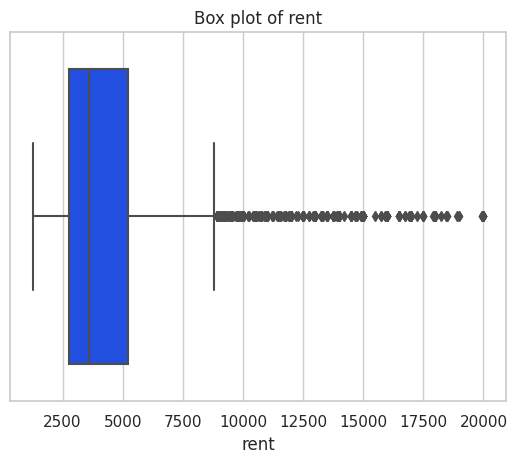

In [ ]:
#create boxplot
sns.boxplot(x="rent", data=data)
plt.title(f"Box plot of rent")
plt.show()

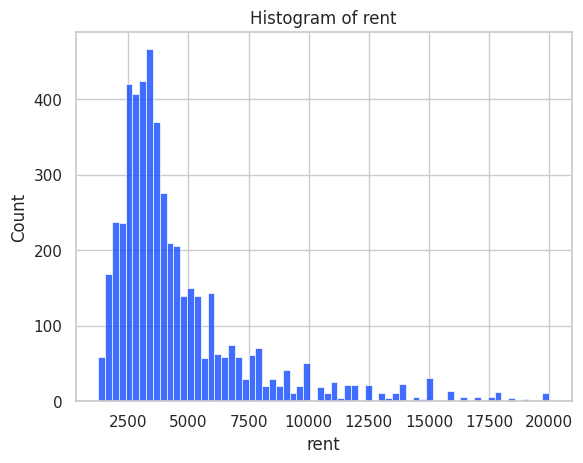

In [ ]:
#create histplot
sns.histplot(x="rent", data=data)
plt.title("Histogram of rent")
#, kde = True
plt.show()

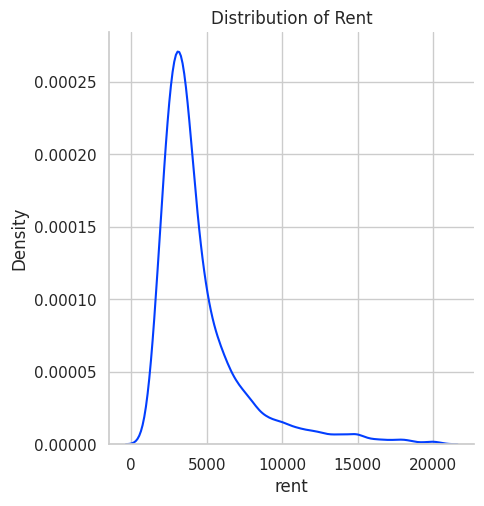

In [ ]:
#create density plot
sns.displot(data["rent"], kind="kde")
#sns.kdeplot(data["rent"])
plt.title("Distribution of Rent")
plt.show()

We can also add some addtional information to plots.

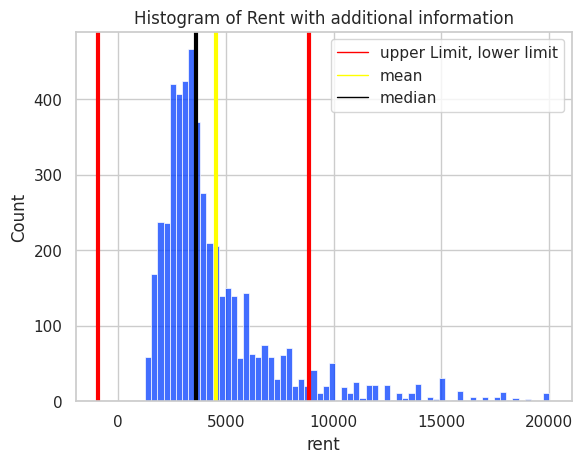

In [ ]:
#for lines legend
import matplotlib.lines as mlines

Q1 = data.rent.quantile(0.25)
Q3 = data.rent.quantile(0.75)
IQR = Q3 - Q1
#limits:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

#create histogram
sns.histplot(x="rent", data=data).set(title="Histogram of Rent with additional information")

#lines
plt.axvline(upper_limit, linewidth=3 , color="red")
plt.axvline(lower_limit, linewidth=3 , color="red")
plt.axvline(data.rent.mean(), linewidth=3 , color="yellow")
plt.axvline(data.rent.median(), linewidth=3 , color="black")

#set legend
limits = mlines.Line2D([], [], color="red", linewidth=1, label="upper Limit, lower limit")
mean = mlines.Line2D([], [], color="yellow", linewidth=1, label="mean")
median = mlines.Line2D([], [], color="black", linewidth=1, label="median")
plt.legend(handles=[limits, mean, median])

plt.show()

#### Categorical features

For categorical features we use bar plot.

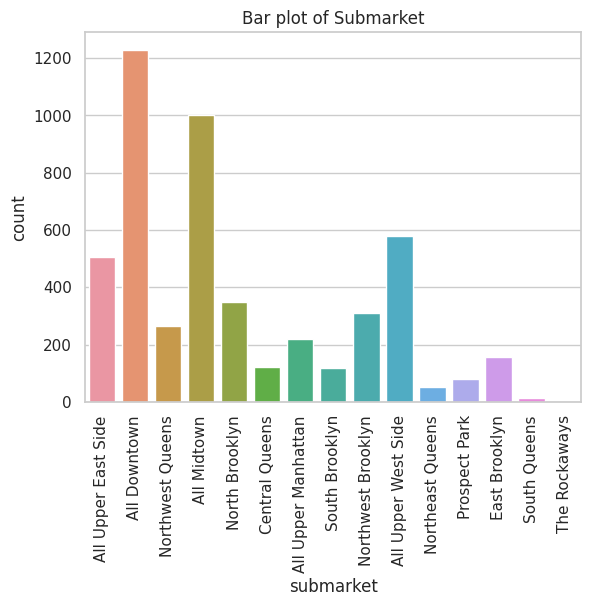

In [ ]:
sns.countplot(x="submarket", data=data)
plt.xticks(rotation=90)
plt.title("Bar plot of Submarket")
plt.show()

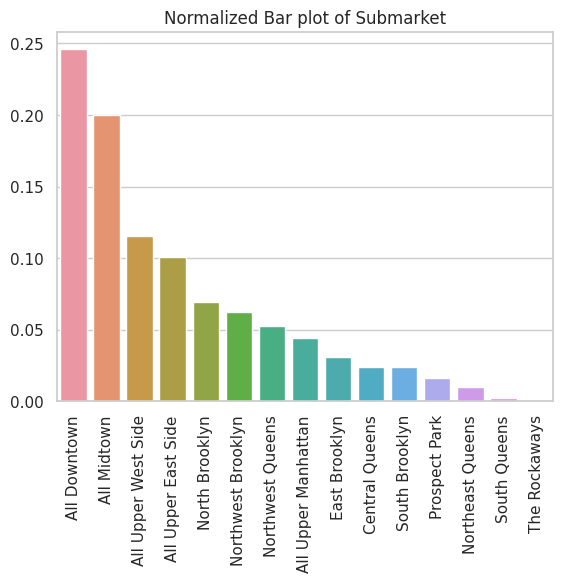

In [ ]:
submarket_counts = data["submarket"].value_counts(normalize=True)
sns.barplot(x=submarket_counts.index, y=submarket_counts.values)
plt.xticks(rotation=90)
plt.title("Normalized Bar plot of Submarket")
plt.show()

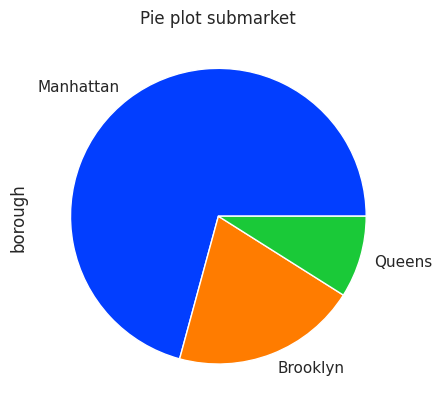

In [ ]:
data.borough.value_counts().plot.pie()
plt.title("Pie plot submarket")
#borough
plt.show()

### Bivariate analysis

#### Numeric vs Numeric

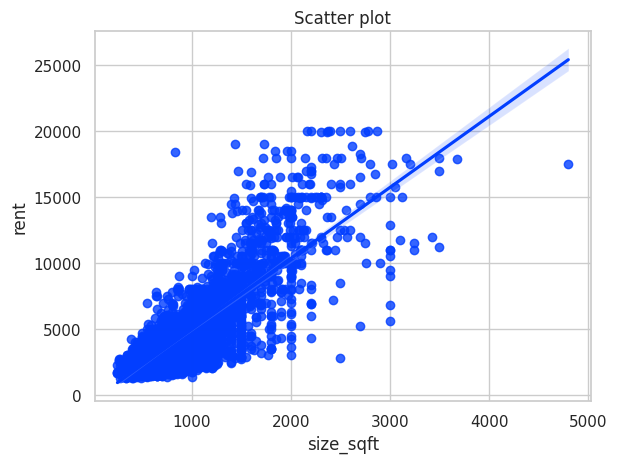

In [ ]:
sns.scatterplot(data=data, x="size_sqft", y="rent")
plt.title("Scatter plot")
#regplot
plt.show()

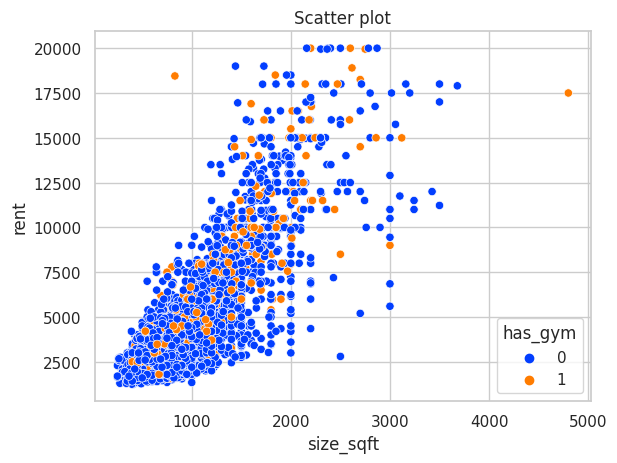

In [ ]:
sns.scatterplot(data=data, x="size_sqft", y="rent", hue="has_gym")
plt.title("Scatter plot")
plt.show()

#### Numeric vs categorical

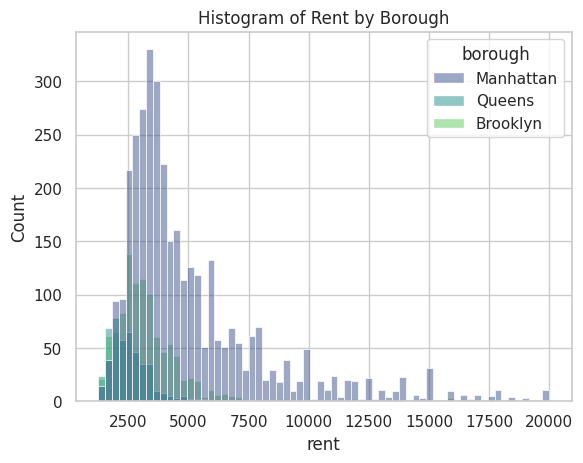

In [ ]:
sns.histplot(data=data, x="rent", hue="borough", palette="viridis")
plt.title("Histogram of Rent by Borough")
plt.show()

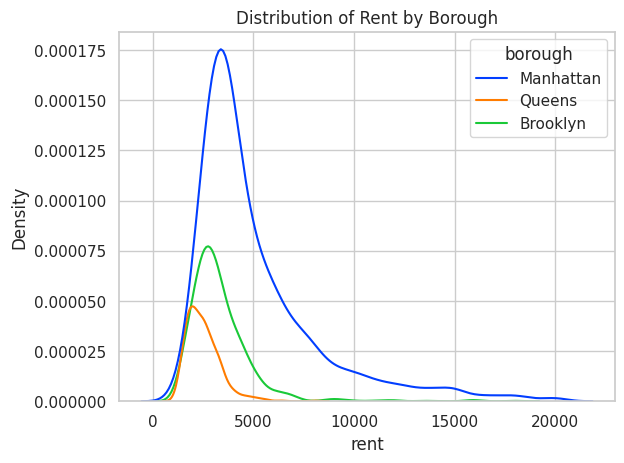

In [ ]:
sns.kdeplot(data=data, x="rent", hue="borough")
plt.title("Distribution of Rent by Borough")
#, multiple="stack"
plt.show()

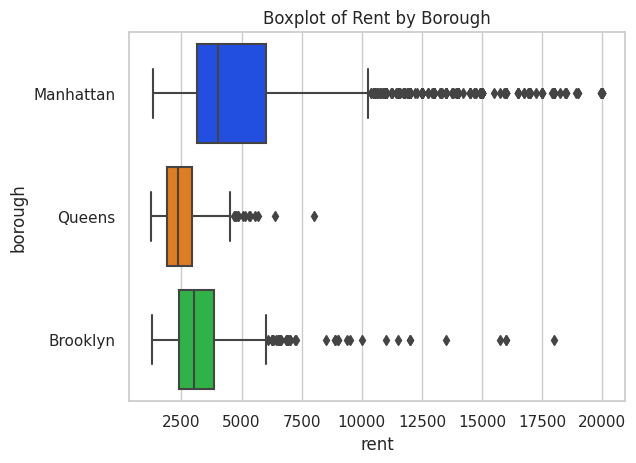

In [ ]:
sns.boxplot(
    x="rent",
    y="borough",
    data=data)
plt.title("Boxplot of Rent by Borough")
plt.show()

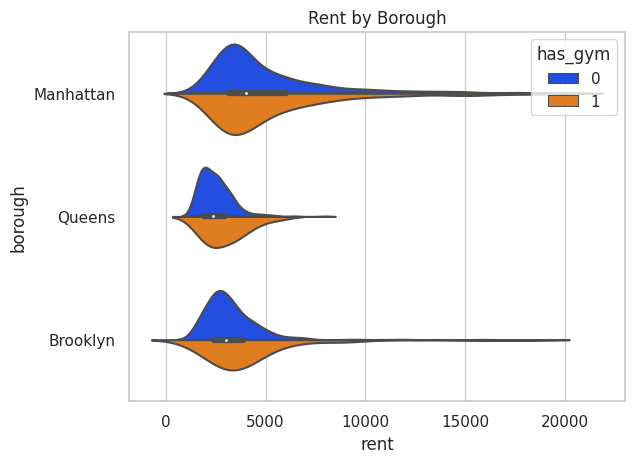

In [ ]:
sns.violinplot(
    x="rent",
    y="borough",
    data=data,
    hue="has_gym",
    split=True)
plt.title("Rent by Borough")
plt.show()

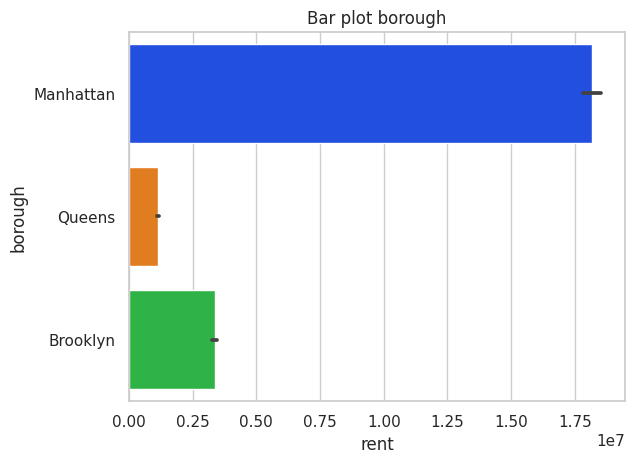

In [ ]:
sns.barplot(y="borough", x="rent", data=data, estimator=sum,  palette="bright")
plt.title("Bar plot borough")
plt.show()
#hue="has_gym"
# estimator=sum
# estimator=np.median
# estimator=max

If you have many categories, not all plots are good for visualization.

<ipython-input-57-d1f0186a0bf8>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x="rent", hue="submarket")


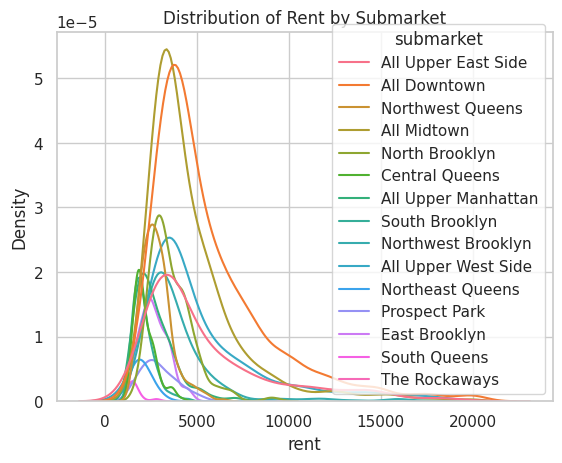

In [ ]:
sns.kdeplot(data=data, x="rent", hue="submarket")
plt.title("Distribution of Rent by Submarket")
#, multiple="stack"
plt.show()

We can consider boxplot or barplot.

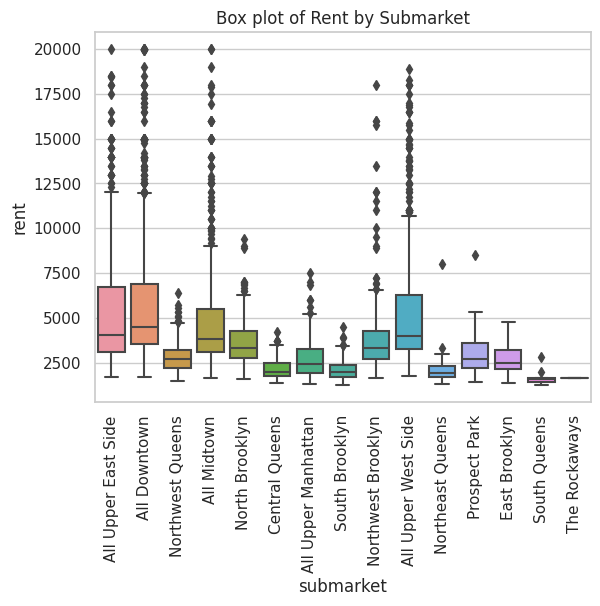

In [ ]:
sns.boxplot(
    y="rent",
    x="submarket",
    data=data)
plt.xticks(rotation=90)
plt.title("Box plot of Rent by Submarket")
plt.show()

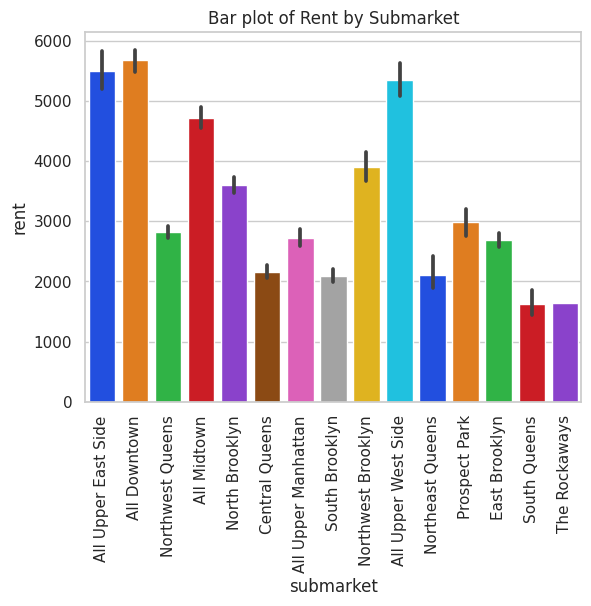

In [ ]:
sns.barplot(x = "submarket", y="rent", data=data, palette="bright")
plt.xticks(rotation = 90)
#hue="has_gym",
plt.title("Bar plot of Rent by Submarket")
plt.show()

#### Categorical vs categorical

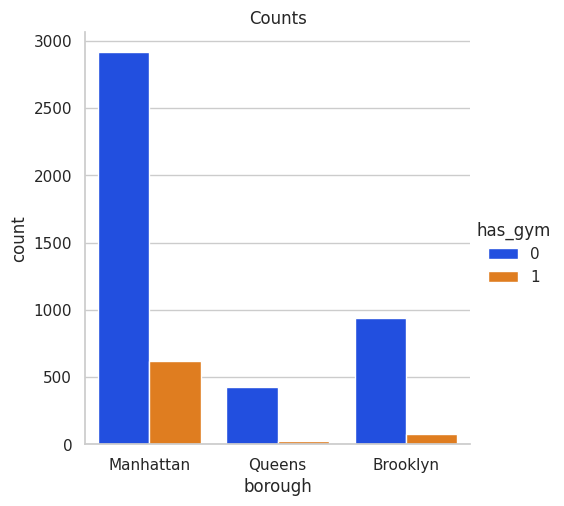

In [ ]:
sns.catplot(x="borough", kind="count", hue="has_gym", data=data)
plt.title("Counts")
plt.show()

We can barely see here something - imbalanced categories. Let's normalize counts.

In [ ]:
normalized_data = data.groupby("borough")["has_gym"].value_counts(normalize = True).reset_index(name="normalized_counts")
normalized_data

borough  has_gym  normalized_counts
0   Brooklyn        0           0.923988
1   Brooklyn        1           0.076012
2  Manhattan        0           0.825092
3  Manhattan        1           0.174908
4     Queens        0           0.948661
5     Queens        1           0.051339

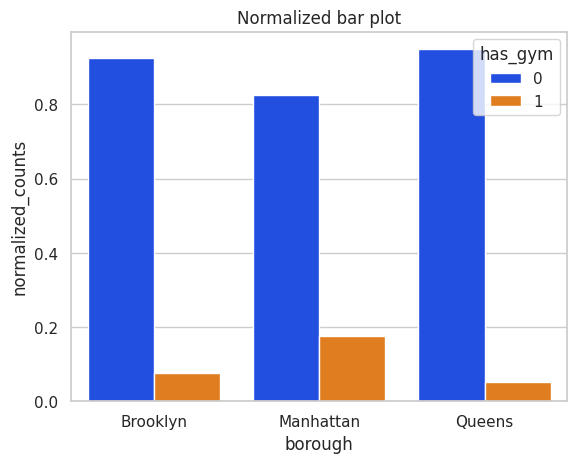

In [ ]:
sns.barplot(x="borough", y="normalized_counts", hue="has_gym", data=normalized_data)
plt.title("Normalized bar plot")
plt.show()

We can use cross tabulation table (each cell in the table represents the count (or frequency) of the combination of its row and column categories).

In [ ]:
ct = pd.crosstab(data["borough"], data["has_gym"])
ct

has_gym       0    1
borough             
Brooklyn    936   77
Manhattan  2920  619
Queens      425   23

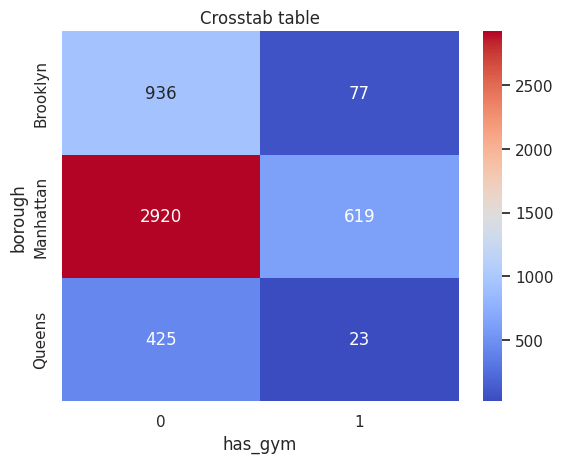

In [ ]:
#heatmap
sns.heatmap(ct, cmap="coolwarm", annot=True, fmt="g", cbar=True)
plt.title("Crosstab table")
plt.show()

### Multivariate analysis

 Correlation matrix

<ipython-input-70-7714fa7c76a4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f")


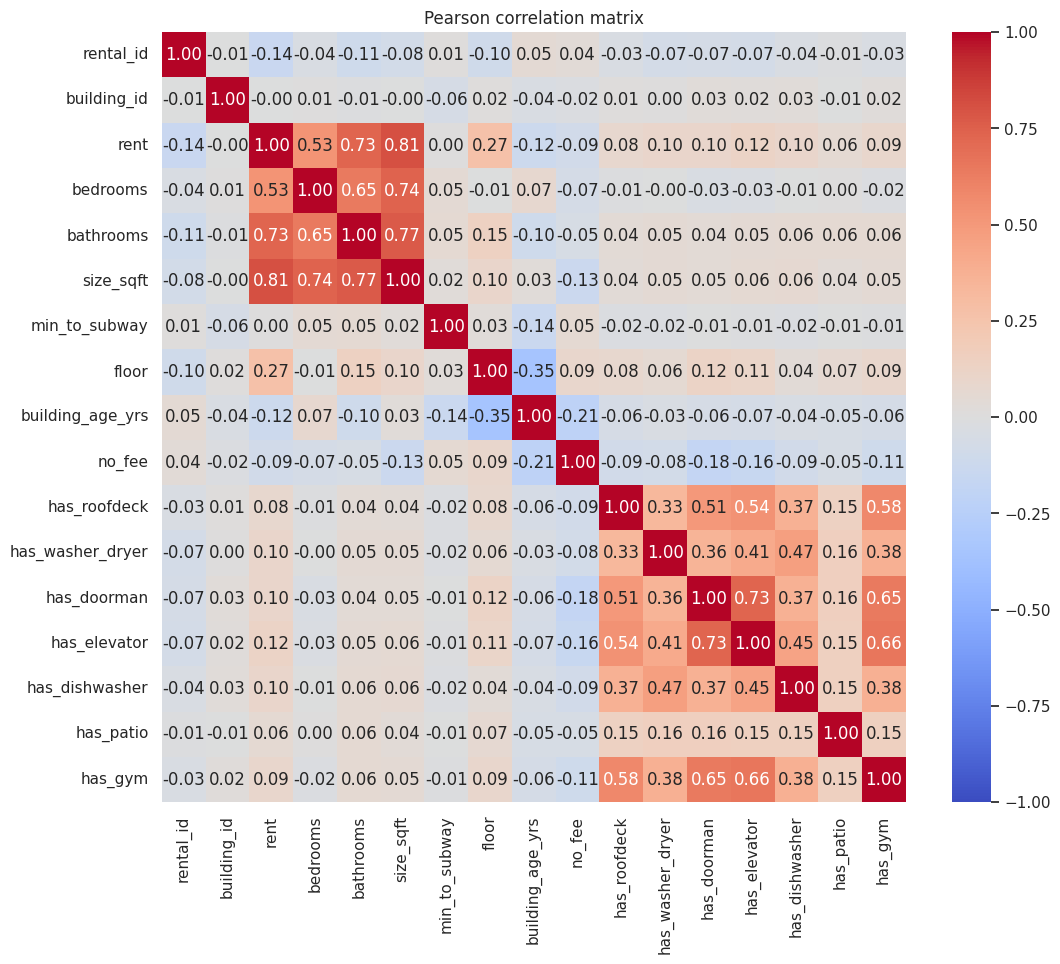

In [ ]:
plt.figure(figsize=(12, 10))

#plt.subplot(121)
sns.heatmap(data.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title("Pearson correlation matrix")

#plt.subplot(122)
# spearman_corr = data.corr(method="spearman")
# sns.heatmap(spearman_corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f")
# plt.title("Spearman correlation matrix")
#annot=True,
#fmt=".2f"
#cmap="RdBu_r"
plt.show()

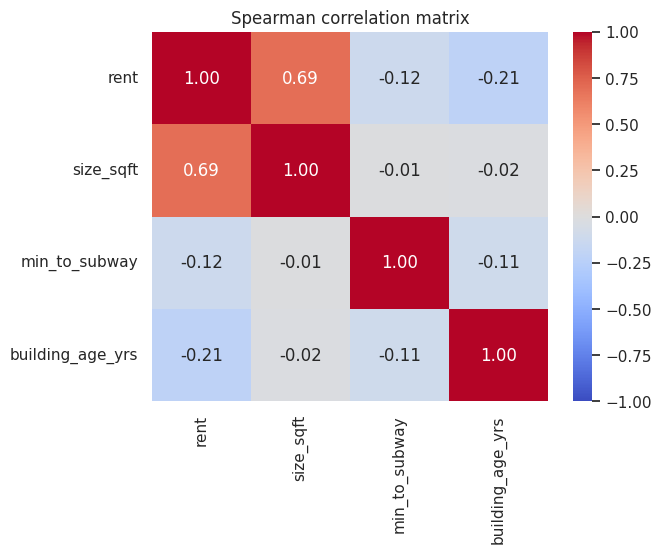

In [ ]:
subset = data[["rent", "size_sqft", "min_to_subway", "building_age_yrs"]]

spearman_corr = subset.corr(method="spearman")
sns.heatmap(spearman_corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title("Spearman correlation matrix")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# Sample usage:
data = pd.DataFrame({'A': ['red', 'blue', 'green', 'red', 'blue'], 'B': ['apple', 'banana', 'apple', 'banana', 'apple']})

print(cramers_v(data['A'], data['B']))

0.0


CPU times: user 2min, sys: 966 ms, total: 2min 1s
Wall time: 2min 21s


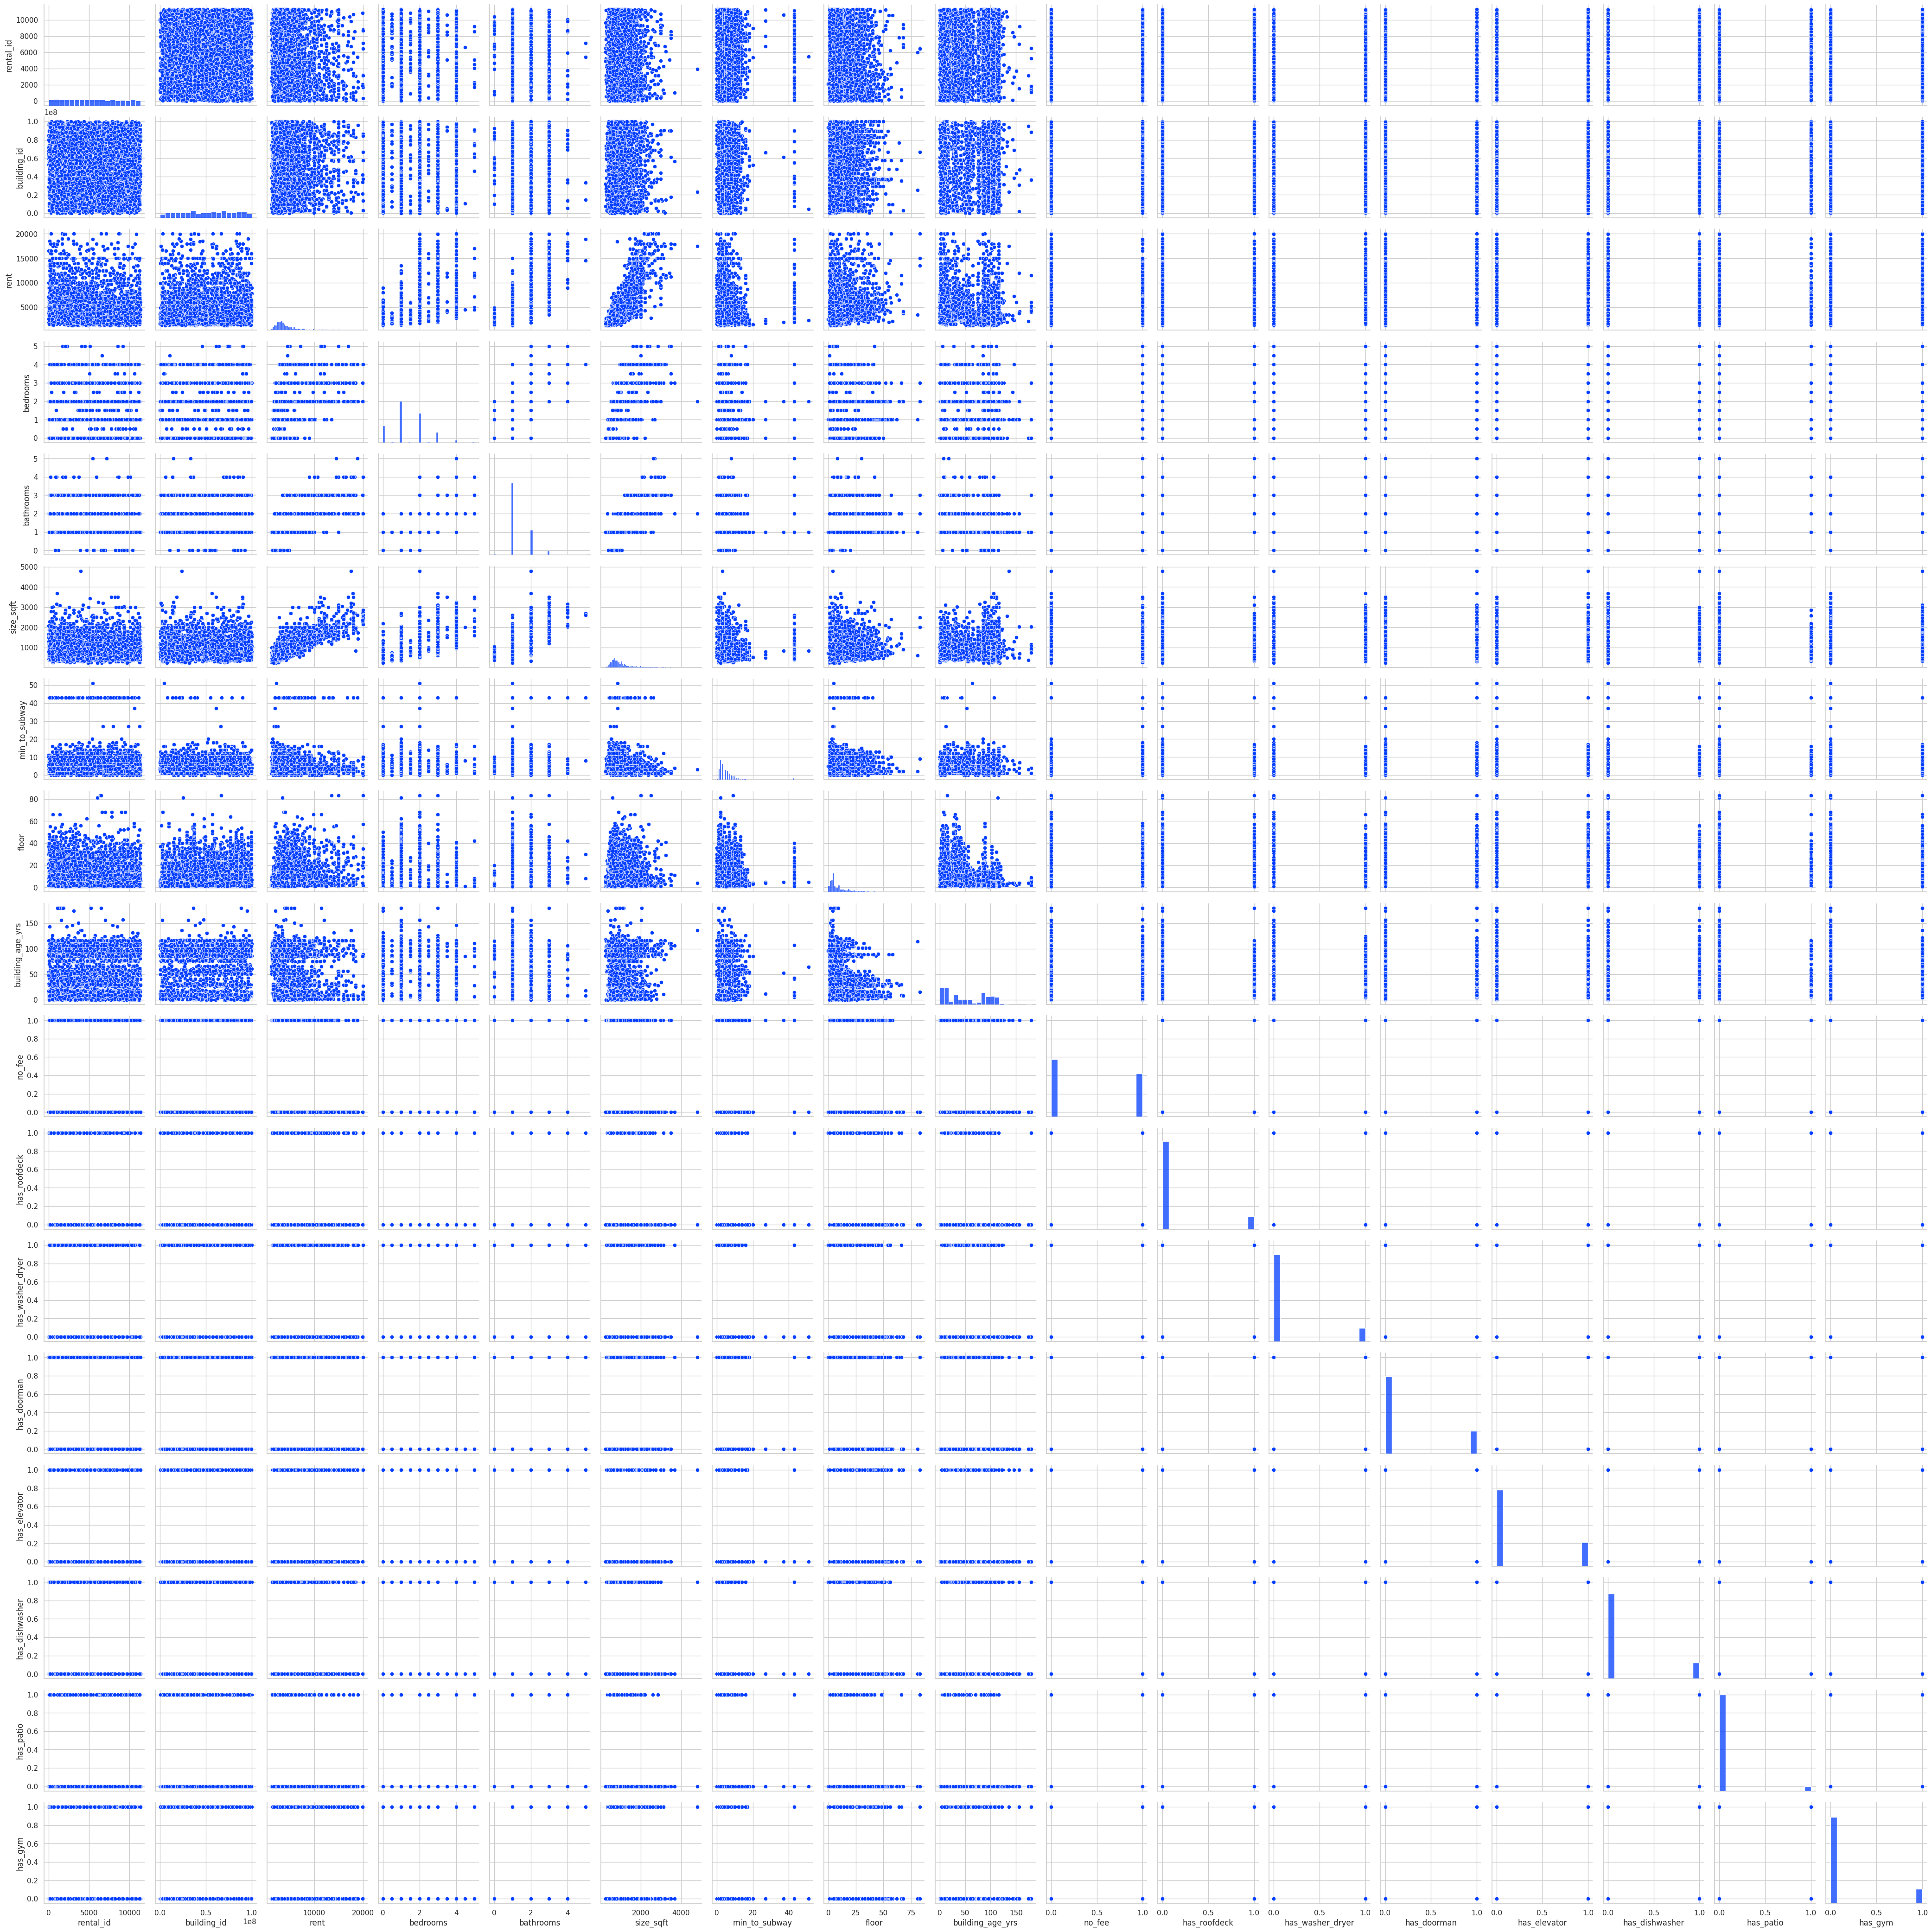

In [ ]:
%%time
sns.pairplot(data)
#data[["rent", "size_sqft", "min_to_subway", "building_age_yrs"]]

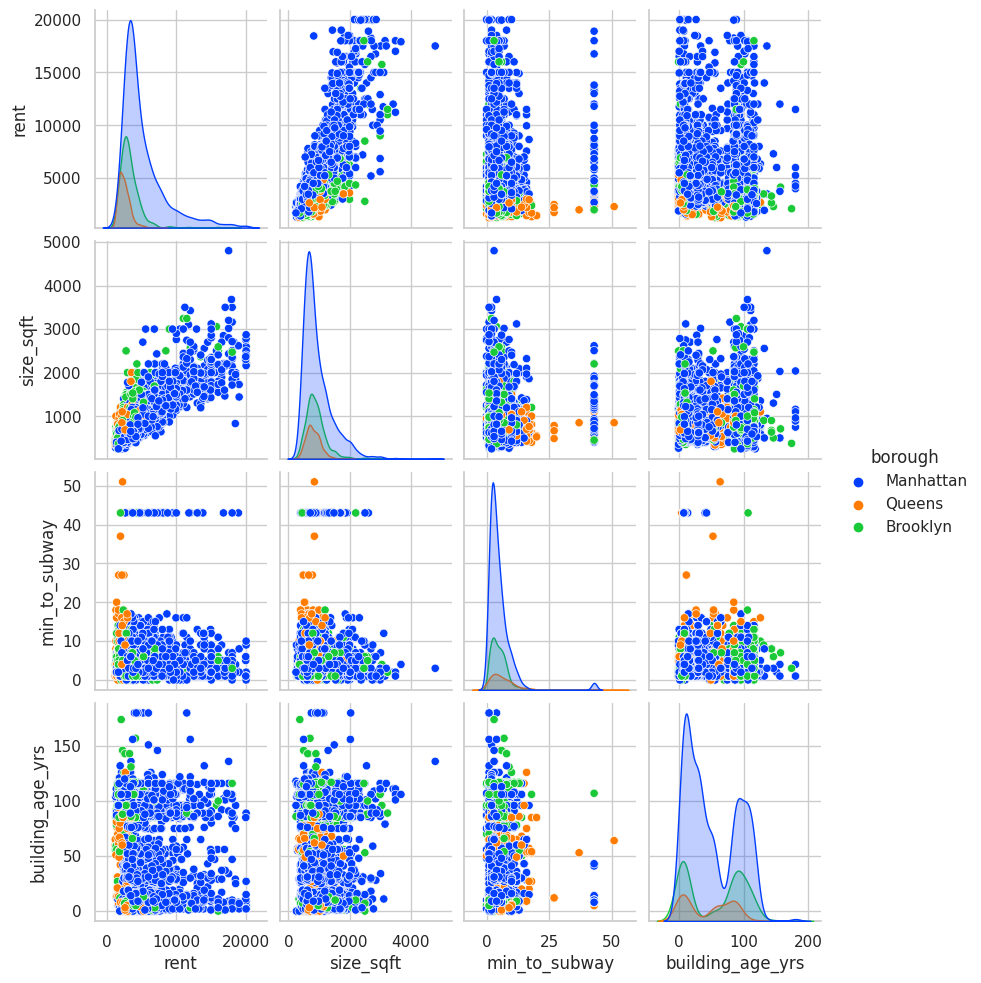

In [ ]:
sns.pairplot(
    data=data[["rent", "size_sqft", "min_to_subway", "building_age_yrs", "borough"]],
    aspect=0.85,
    diag_kind='kde', hue="borough")
#, diag_kind='kde')
#, hue="borough")
plt.show()

## <a name="dataprep"> Data Preparation

Data preperation is the initial step of a Data Science project. It consists of many different cases and methods spesific to those cases.



### <a name="prep"> Data Preparation

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#SET YOUR PATH TO THE DATA
data_path = "/content/gdrive/MyDrive/DS2022/DS_basic_course/EDA/Workshop/data"
file_name = "train.csv"

In [ ]:
data = pd.read_csv(os.path.join(data_path, file_name))
data.shape

(1460, 81)

In [ ]:
pd.set_option("display.max_rows", None)

In [ ]:
data.head().T
#.T

0        1        2        3        4
Id                   1        2        3        4        5
MSSubClass          60       20       60       70       60
MSZoning            RL       RL       RL       RL       RL
LotFrontage       65.0     80.0     68.0     60.0     84.0
LotArea           8450     9600    11250     9550    14260
Street            Pave     Pave     Pave     Pave     Pave
Alley              NaN      NaN      NaN      NaN      NaN
LotShape           Reg      Reg      IR1      IR1      IR1
LandContour        Lvl      Lvl      Lvl      Lvl      Lvl
Utilities       AllPub   AllPub   AllPub   AllPub   AllPub
LotConfig       Inside      FR2   Inside   Corner      FR2
LandSlope          Gtl      Gtl      Gtl      Gtl      Gtl
Neighborhood   CollgCr  Veenker  CollgCr  Crawfor  NoRidge
Condition1        Norm    Feedr     Norm     Norm     Norm
Condition2        Norm     Norm     Norm     Norm     Norm
BldgType          1Fam     1Fam     1Fam     1Fam     1Fam
HouseStyle      2Story   1Story   2Story   2Story   2Story
OverallQual          7        6        7        7        8
OverallCond          5        8        5        5        5
YearBuilt         2003     1976     2001     1915     2000
YearRemodAdd      2003     1976     2002     1970     2000
RoofStyle        Gable    Gable    Gable    Gable    Gable
RoofMatl       CompShg  CompShg  CompShg  CompShg  CompShg
Exterior1st    VinylSd  MetalSd  VinylSd  Wd Sdng  VinylSd
Exterior2nd    VinylSd  MetalSd  VinylSd  Wd Shng  VinylSd
MasVnrType     BrkFace     None  BrkFace     None  BrkFace
MasVnrArea       196.0      0.0    162.0      0.0    350.0
ExterQual           Gd       TA       Gd       TA       Gd
ExterCond           TA       TA       TA       TA       TA
Foundation       PConc   CBlock    PConc   BrkTil    PConc
BsmtQual            Gd       Gd       Gd       TA       Gd
BsmtCond            TA       TA       TA       Gd       TA
BsmtExposure        No       Gd       Mn       No       Av
BsmtFinType1       GLQ      ALQ      GLQ      ALQ      GLQ
BsmtFinSF1         706      978      486      216      655
BsmtFinType2       Unf      Unf      Unf      Unf      Unf
BsmtFinSF2           0        0        0        0        0
BsmtUnfSF          150      284      434      540      490
TotalBsmtSF        856     1262      920      756     1145
Heating           GasA     GasA     GasA     GasA     GasA
HeatingQC           Ex       Ex       Ex       Gd       Ex
CentralAir           Y        Y        Y        Y        Y
Electrical       SBrkr    SBrkr    SBrkr    SBrkr    SBrkr
1stFlrSF           856     1262      920      961     1145
2ndFlrSF           854        0      866      756     1053
LowQualFinSF         0        0        0        0        0
GrLivArea         1710     1262     1786     1717     2198
BsmtFullBath         1        0        1        1        1
BsmtHalfBath         0        1        0        0        0
FullBath             2        2        2        1        2
HalfBath             1        0        1        0        1
BedroomAbvGr         3        3        3        3        4
KitchenAbvGr         1        1        1        1        1
KitchenQual         Gd       TA       Gd       Gd       Gd
TotRmsAbvGrd         8        6        6        7        9
Functional         Typ      Typ      Typ      Typ      Typ
Fireplaces           0        1        1        1        1
FireplaceQu        NaN       TA       TA       Gd       TA
GarageType      Attchd   Attchd   Attchd   Detchd   Attchd
GarageYrBlt     2003.0   1976.0   2001.0   1998.0   2000.0
GarageFinish       RFn      RFn      RFn      Unf      RFn
GarageCars           2        2        2        3        3
GarageArea         548      460      608      642      836
GarageQual          TA       TA       TA       TA       TA
GarageCond          TA       TA       TA       TA       TA
PavedDrive           Y        Y        Y        Y        Y
WoodDeckSF           0      298        0        0      192
OpenPorch

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
pd.reset_option("display.max_rows")

Check duplicates

In [ ]:
(data.duplicated() == True).sum()

0

Ratio of unique values.

In [ ]:
(data.nunique() / len(data)).sort_values(ascending=False)

Id            1.000000
LotArea       0.734932
GrLivArea     0.589726
BsmtUnfSF     0.534247
1stFlrSF      0.515753
                ...   
HalfBath      0.002055
Street        0.001370
CentralAir    0.001370
Utilities     0.001370
Alley         0.001370
Length: 81, dtype: float64

`Id` all values are unique, it"s useless for ml, we can drop this feature.

In [ ]:
data = data.drop(["Id"], axis=1)

The lowest variance features

In [ ]:
data.var().sort_values()[:5]

<ipython-input-91-ec5ba49ac2c6>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.var().sort_values()[:5]


KitchenAbvGr    0.048549
BsmtHalfBath    0.057003
HalfBath        0.252894
BsmtFullBath    0.269268
FullBath        0.303508
dtype: float64

In [ ]:
data["KitchenAbvGr"].value_counts(normalize=True)
#normalize=True

1    0.953425
2    0.044521
3    0.001370
0    0.000685
Name: KitchenAbvGr, dtype: float64

In [ ]:
data = data.drop(["KitchenAbvGr"], axis=1)

In [ ]:
data["BsmtHalfBath"].value_counts(normalize=True)

0    0.943836
1    0.054795
2    0.001370
Name: BsmtHalfBath, dtype: float64

In [ ]:
data = data.drop(["BsmtHalfBath"], axis=1)

In [ ]:
data.var().sort_values()[-5:]

<ipython-input-97-cb03632f0b34>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.var().sort_values()[-5:]


BsmtFinSF1    2.080255e+05
MiscVal       2.461381e+05
GrLivArea     2.761296e+05
LotArea       9.962565e+07
SalePrice     6.311111e+09
dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
for column in data.columns:
  print(f'{column} number of unique values: {data[column].nunique()}')

Id number of unique values: 1460
MSSubClass number of unique values: 15
MSZoning number of unique values: 5
LotFrontage number of unique values: 110
LotArea number of unique values: 1073
Street number of unique values: 2
Alley number of unique values: 2
LotShape number of unique values: 4
LandContour number of unique values: 4
Utilities number of unique values: 2
LotConfig number of unique values: 5
LandSlope number of unique values: 3
Neighborhood number of unique values: 25
Condition1 number of unique values: 9
Condition2 number of unique values: 8
BldgType number of unique values: 5
HouseStyle number of unique values: 8
OverallQual number of unique values: 10
OverallCond number of unique values: 9
YearBuilt number of unique values: 112
YearRemodAdd number of unique values: 61
RoofStyle number of unique values: 6
RoofMatl number of unique values: 8
Exterior1st number of unique values: 15
Exterior2nd number of unique values: 16
MasVnrType number of unique values: 4
MasVnrArea number o

In [ ]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageQual       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageYrBlt      81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrType        8  0.005479
MasVnrArea        8  0.005479
Electrical        1  0.000685
MSSubClass        0  0.000000

In [ ]:
data["PoolQC"].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [ ]:
data = data.drop(["PoolQC", "Alley", "Fence", "MiscFeature"], axis=1)

Since we have different approaches for data preparation for numeric and categorical features, we will split them.

In [ ]:
continious_features = data.select_dtypes("number").columns
categorical_features = data.select_dtypes(np.object).columns

<ipython-input-102-0566f16785ed>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = data.select_dtypes(np.object).columns


In [ ]:
len(continious_features), len(categorical_features)

(35, 39)

In [ ]:
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
#strategy="median"
#strategy = "most_frequent"
imputed_mean_data = pd.DataFrame(imputer_mean.fit_transform(data[continious_features]), columns=continious_features)

In [ ]:
imputed_mean_data.describe().T

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1460.0      70.049958     22.024023     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1460.0     103.685262    180.569112      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1460.0    1978.506164     23.994583   1900.0    1962.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                         50%        75%       max  
MSSubClass         50.000000      70.00     190.0  
LotFrontage        70.049958      79.00     313.0  
LotArea          9478.500000   11601.50  215245.0  
OverallQual         6.000000       7.00      10.0  
OverallCond         5.000000       6.00       9.0  
YearBuilt        1973.000000    2000.00    2010.0  
YearRemodAdd     1994.000000    2004.00    2010.0  
MasVnrArea          0.000000     164.25    1600.0  
BsmtFinSF1        383.500000     712.25    5644.0  
BsmtFinSF2          0.000000       0.00    1474.0  
BsmtUnfSF         477.500000     808.00    2336.0  
TotalBsmtSF       991.500000    1298.25    6110.0  
1stFlrSF         1087.000000    1391.25    4692.0  
2ndFlrSF            0.000000     728.00    2065.0  
LowQualFinSF        0.000000       0.00     572.0  
GrLivArea        1464.000000    1776.75    5642.0  
BsmtFullBath        0.000000       1.00       3.0  
FullBath            2.000000       2.00       3.0  
HalfBath            0.000000       1.00       2.0  
BedroomAbvGr        3.000000       3.00       8.0  
TotRmsAbvGrd        6.000000       7.00      14.0  
Fireplaces          1.000000       1.00       3.0  
GarageYrBlt      1978.506164    2001.00    2010.0  
GarageCars          2.000000       2.00       4.0  
GarageArea        480.000000     576.00    1418.0  

Imputation with KNN  (k-Nearest Neighbors) [docs](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html).

The K-Nearest Neighbors (KNN) algorithm selects the "k" closest or most similar data points in the dataset.

For each data point with missing values, the algorithm computes the distance to every other data point in the dataset. Then it identifies the k data points ("neighbors") that are closest to the data point with missing values based on the chosen distance measure.

In [ ]:
from sklearn.impute import KNNImputer
imputer_knn = KNNImputer(n_neighbors=5, missing_values=np.nan)

imputed_knn_data = pd.DataFrame(imputer_mean.fit_transform(data[continious_features]), columns=continious_features)

Categorical

In [ ]:
imputer_freq = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

imputed_freq_data = pd.DataFrame(imputer_freq.fit_transform(data[categorical_features]), columns=categorical_features)

In [ ]:
print(imputed_freq_data.GarageCond.isna().sum())
print(data.GarageCond.isna().sum())

0
81


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler()
display(pd.DataFrame(min_max_scaler.fit_transform(imputed_mean_data), columns=continious_features).head())
display(data[continious_features].head())

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.235294     0.150685  0.033420     0.666667        0.500   0.949275   
1    0.000000     0.202055  0.038795     0.555556        0.875   0.753623   
2    0.235294     0.160959  0.046507     0.666667        0.500   0.934783   
3    0.294118     0.133562  0.038561     0.666667        0.500   0.311594   
4    0.235294     0.215753  0.060576     0.777778        0.500   0.927536   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0      0.883333     0.12250    0.125089         0.0  ...    0.000000   
1      0.433333     0.00000    0.173281         0.0  ...    0.347725   
2      0.866667     0.10125    0.086109         0.0  ...    0.000000   
3      0.333333     0.00000    0.038271         0.0  ...    0.000000   
4      0.833333     0.21875    0.116052         0.0  ...    0.224037   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0     0.111517       0.000000        0.0          0.0       0.0      0.0   
1     0.000000       0.000000        0.0          0.0       0.0      0.0   
2     0.076782       0.000000        0.0          0.0       0.0      0.0   
3     0.063985       0.492754        0.0          0.0       0.0      0.0   
4     0.153565       0.000000        0.0          0.0       0.0      0.0   

     MoSold  YrSold  SalePrice  
0  0.090909    0.50   0.241078  
1  0.363636    0.25   0.203583  
2  0.727273    0.50   0.261908  
3  0.090909    0.00   0.145952  
4  1.000000    0.50   0.298709  

[5 rows x 35 columns]

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 35 columns]

In [ ]:
data["MSSubClass"].min()

20

In [ ]:
pd.DataFrame(min_max_scaler.fit_transform(imputed_mean_data), columns=continious_features).max()

MSSubClass       1.0
LotFrontage      1.0
LotArea          1.0
OverallQual      1.0
OverallCond      1.0
YearBuilt        1.0
YearRemodAdd     1.0
MasVnrArea       1.0
BsmtFinSF1       1.0
BsmtFinSF2       1.0
BsmtUnfSF        1.0
TotalBsmtSF      1.0
1stFlrSF         1.0
2ndFlrSF         1.0
LowQualFinSF     1.0
GrLivArea        1.0
BsmtFullBath     1.0
FullBath         1.0
HalfBath         1.0
BedroomAbvGr     1.0
TotRmsAbvGrd     1.0
Fireplaces       1.0
GarageYrBlt      1.0
GarageCars       1.0
GarageArea       1.0
WoodDeckSF       1.0
OpenPorchSF      1.0
EnclosedPorch    1.0
3SsnPorch        1.0
ScreenPorch      1.0
PoolArea         1.0
MiscVal          1.0
MoSold           1.0
YrSold           1.0
SalePrice        1.0
dtype: float64

In [ ]:
standard_scaler = StandardScaler()

display(pd.DataFrame(standard_scaler.fit_transform(imputed_mean_data), columns=continious_features).head())
display(data.head())

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.073375    -0.229372 -0.207142     0.651479    -0.517200   1.050994   
1   -0.872563     0.451936 -0.091886    -0.071836     2.179628   0.156734   
2    0.073375    -0.093110  0.073480     0.651479    -0.517200   0.984752   
3    0.309859    -0.456474 -0.096897     0.651479    -0.517200  -1.863632   
4    0.073375     0.633618  0.375148     1.374795    -0.517200   0.951632   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0      0.878668    0.511418    0.575425   -0.288653  ...   -0.752176   
1     -0.429577   -0.574410    1.171992   -0.288653  ...    1.626195   
2      0.830215    0.323060    0.092907   -0.288653  ...   -0.752176   
3     -0.720298   -0.574410   -0.499274   -0.288653  ...   -0.752176   
4      0.733308    1.364570    0.463568   -0.288653  ...    0.780197   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
0     0.216503      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688   
1    -0.704483      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688   
2    -0.070361      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688   
3    -0.176048       4.092524  -0.116339    -0.270208 -0.068692 -0.087688   
4     0.563760      -0.359325  -0.116339    -0.270208 -0.068692 -0.087688   

     MoSold    YrSold  SalePrice  
0 -1.599111  0.138777   0.347273  
1 -0.489110 -0.614439   0.007288  
2  0.990891  0.138777   0.536154  
3 -1.599111 -1.367655  -0.515281  
4  2.100892  0.138777   0.869843  

[5 rows x 35 columns]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 74 columns]

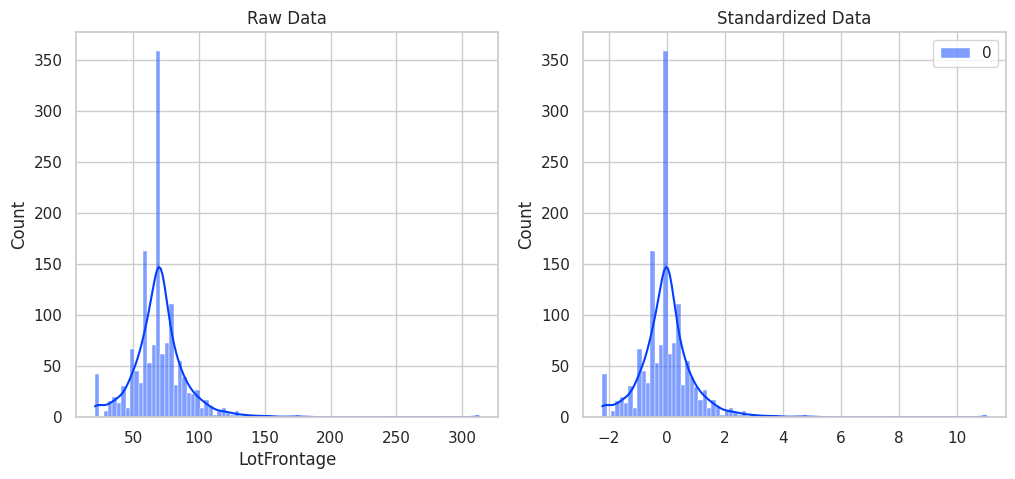

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#raw data
sns.histplot(imputed_mean_data["LotFrontage"], kde=True, ax=axes[0])
axes[0].set_title("Raw Data")

#standardized data
sns.histplot(standard_scaler.fit_transform(imputed_mean_data[["LotFrontage"]]), kde=True, ax=axes[1])
axes[1].set_title("Standardized Data")

plt.show()

In [ ]:
pd.DataFrame(standard_scaler.fit_transform(imputed_mean_data), columns=continious_features).min()
#.max()

MSSubClass      -0.872563
LotFrontage     -2.227875
LotArea         -0.923729
OverallQual     -3.688413
OverallCond     -4.112970
YearBuilt       -3.287824
YearRemodAdd    -1.689368
MasVnrArea      -0.574410
BsmtFinSF1      -0.973018
BsmtFinSF2      -0.288653
BsmtUnfSF       -1.284176
TotalBsmtSF     -2.411167
1stFlrSF        -2.144172
2ndFlrSF        -0.795163
LowQualFinSF    -0.120242
GrLivArea       -2.249120
BsmtFullBath    -0.819964
FullBath        -2.841822
HalfBath        -0.761621
BedroomAbvGr    -3.514952
TotRmsAbvGrd    -2.780469
Fireplaces      -0.951226
GarageYrBlt     -3.272950
GarageCars      -2.365440
GarageArea      -2.212963
WoodDeckSF      -0.752176
OpenPorchSF     -0.704483
EnclosedPorch   -0.359325
3SsnPorch       -0.116339
ScreenPorch     -0.270208
PoolArea        -0.068692
MiscVal         -0.087688
MoSold          -1.969111
YrSold          -1.367655
SalePrice       -1.838704
dtype: float64

In [ ]:
data.head().T

0       1       2        3       4
MSSubClass         60      20      60       70      60
MSZoning           RL      RL      RL       RL      RL
LotFrontage      65.0    80.0    68.0     60.0    84.0
LotArea          8450    9600   11250     9550   14260
Street           Pave    Pave    Pave     Pave    Pave
...               ...     ...     ...      ...     ...
MoSold              2       5       9        2      12
YrSold           2008    2007    2008     2006    2008
SaleType           WD      WD      WD       WD      WD
SaleCondition  Normal  Normal  Normal  Abnorml  Normal
SalePrice      208500  181500  223500   140000  250000

[74 rows x 5 columns]

"SalePrice" is the target.

In [ ]:
data["SalePrice"].median()

163000.0

In [ ]:
data["SalePriceBinary"] = data["SalePrice"].apply(lambda x: x>data["SalePrice"].median())

In [ ]:
data_sales = data[["SalePrice", "SalePriceBinary"]]
data_sales.head()

SalePrice  SalePriceBinary
0     208500             True
1     181500             True
2     223500             True
3     140000            False
4     250000             True

Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data["SalePriceBinary"])

label_encoder.classes_

array([False,  True])

In [ ]:
type(y_encoded)

numpy.ndarray

In [ ]:
np.unique(y_encoded)

array([0, 1])

In [ ]:
one_hot_encoder = OneHotEncoder(drop = "first")

one_hot_encoded = one_hot_encoder.fit_transform(imputed_freq_data)

In [ ]:
pd.DataFrame(one_hot_encoded.todense(), columns=one_hot_encoder.get_feature_names_out()).head().T

0    1    2    3    4
MSZoning_FV            0.0  0.0  0.0  0.0  0.0
MSZoning_RH            0.0  0.0  0.0  0.0  0.0
MSZoning_RL            1.0  1.0  1.0  1.0  1.0
MSZoning_RM            0.0  0.0  0.0  0.0  0.0
Street_Pave            1.0  1.0  1.0  1.0  1.0
...                    ...  ...  ...  ...  ...
SaleCondition_AdjLand  0.0  0.0  0.0  0.0  0.0
SaleCondition_Alloca   0.0  0.0  0.0  0.0  0.0
SaleCondition_Family   0.0  0.0  0.0  0.0  0.0
SaleCondition_Normal   1.0  1.0  1.0  0.0  1.0
SaleCondition_Partial  0.0  0.0  0.0  0.0  0.0

[200 rows x 5 columns]

In [ ]:
data.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [ ]:
one_hot_encoder.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['AllPub', 'NoSeWa'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'],
       dtype=object),
 array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object),
 array(['1.5Fin', '1.5Unf', '1Story', '2.

In [ ]:
pd.DataFrame(one_hot_encoded.todense(), columns=one_hot_encoder.get_feature_names_out()).shape

(1460, 200)

### Pipeline

Pipeline sequentially applies a list of transforms on the data, [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold

continious_features = data.select_dtypes("number").columns
categorical_features = data.select_dtypes(np.object).columns
print(f"There are {len(continious_features)} numeric features and {len(categorical_features)} categorical.")

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler()),
    ("variance_trsh", VarianceThreshold(threshold=0.1))
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
    ("ohe", OneHotEncoder(sparse_output=False, drop="first")),
    ("variance_trsh", VarianceThreshold(threshold=.98 * (1 - .98)))
])


pipe = ColumnTransformer(transformers=[
    ("cat", cat_pipe, categorical_features),
    ("num", num_pipe, continious_features)
])

There are 35 numeric features and 39 categorical.


<ipython-input-128-5ee969438833>:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = data.select_dtypes(np.object).columns


In [ ]:
data.shape

(1460, 75)

In [ ]:
X = pipe.fit_transform(data)
X.shape

(1460, 122)

In [ ]:
type(X)

numpy.ndarray

### <a name="datadr"> Dimensionality Reduction

#### PCA (Principal Components Analysis)

Let's try PCA with 2 principal components.

In [ ]:
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X)
X_pca2.shape

(1460, 2)

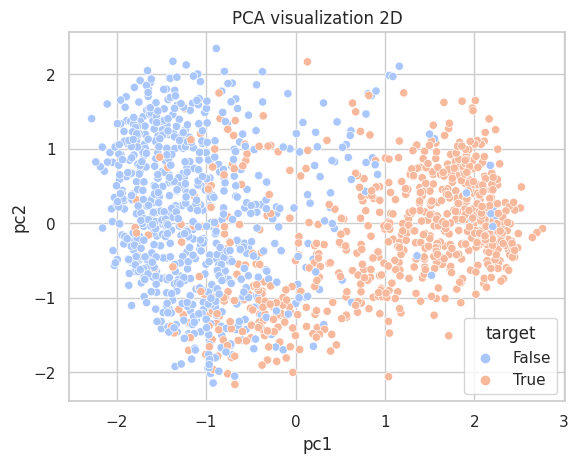

In [ ]:
plot_df = pd.DataFrame.from_records(data=X_pca2[:,:2],columns=["pc1","pc2"])
y = ["SalePriceBinary"]
plot_df["target"] = data[y]

sns.scatterplot(x="pc1", y="pc2", hue="target", palette="coolwarm", data=plot_df)
plt.title("PCA visualization 2D")
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.1665057 , 0.06684035])

In [ ]:
pca = PCA(n_components=0.95).fit(X)

len(pca.explained_variance_ratio_)

69

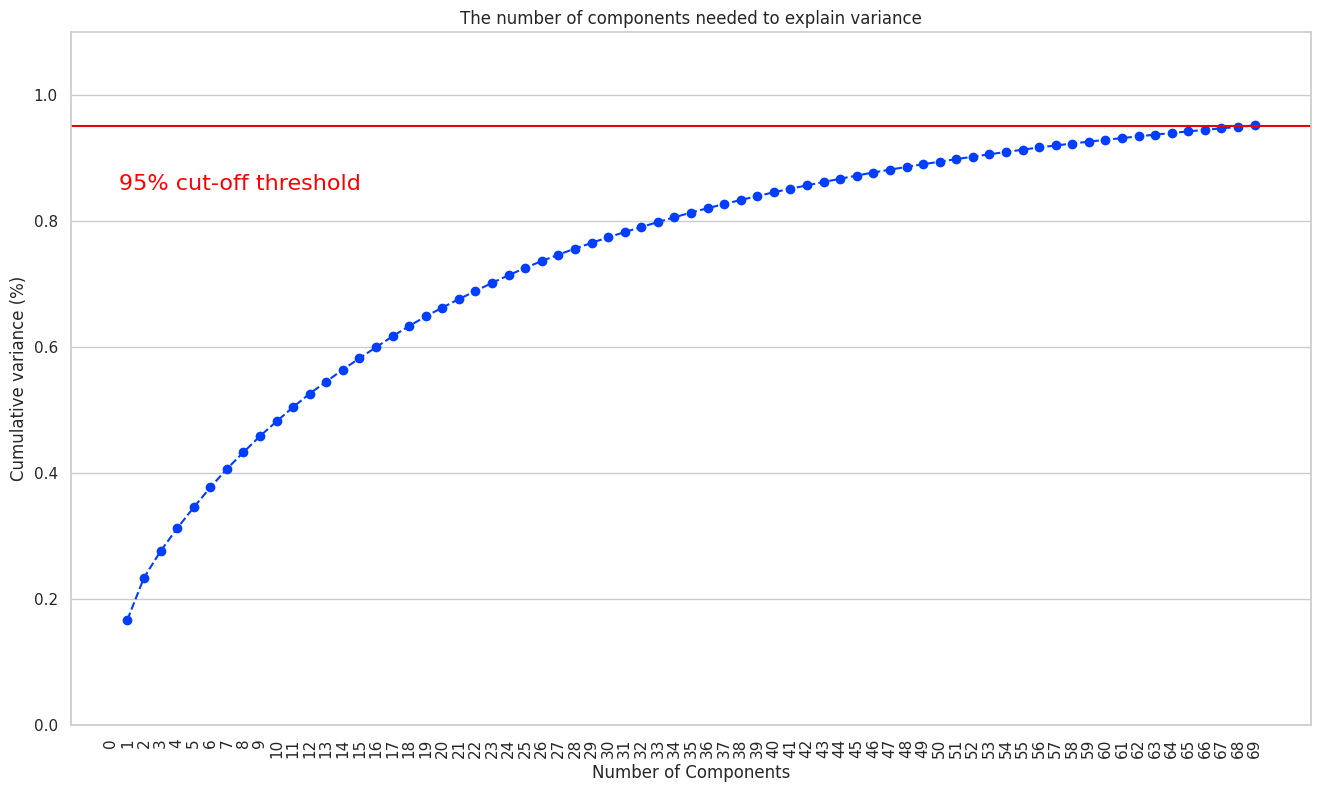

In [ ]:
number_of_ticks = len(pca.explained_variance_ratio_) + 1

fig, ax = plt.subplots(figsize=(16, 9))
x_ticks = np.arange(1, number_of_ticks, step=1)
y_values = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(x_ticks, y_values, marker="o", linestyle="--", color="b")

plt.xlabel("Number of Components")
plt.xticks(np.arange(0, number_of_ticks, step=1))
plt.ylabel("Cumulative variance (%)")
plt.title("The number of components needed to explain variance")

plt.axhline(y=0.95, color="r", linestyle="-")
plt.text(0.5, 0.85, "95% cut-off threshold", color = "red", fontsize=16)

ax.grid(axis="x")
plt.xticks(rotation=90)
plt.show()

Let's take a look on our data in 3D. We will use [plotly](https://plotly.com/python/) library.


In [ ]:
pca = PCA(n_components=3)
X_pca3 = pca.fit_transform(X)

In [ ]:
import plotly.express as px

plot_df = pd.DataFrame.from_records(data=X_pca3[:,:3],columns=["pc1","pc2", "pc3"])
y = ["SalePriceBinary"]
plot_df["target"] = data[y]

# Assuming that plot_df is your DataFrame and you have three principal components "pc1", "pc2" and "pc3",
# and "target" is what you want to use for coloring the points
fig = px.scatter_3d(plot_df, x="pc1", y="pc2", z="pc3", color="target",
                    color_continuous_scale="coolwarm",
                    title="PCA visualization 3D")

fig.show()

#### t-SNE (t-Stochastic Neighbor Embedding)

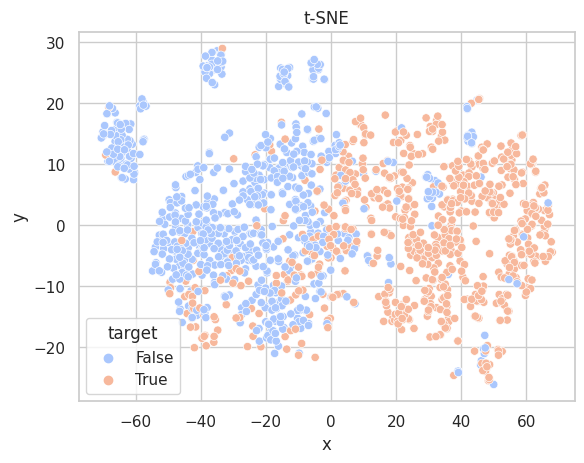

In [ ]:
tsne = TSNE()
tsne_X = tsne.fit_transform(X)

plot_df = pd.DataFrame.from_records(data=tsne_X,columns=["x","y"])
y = ["SalePriceBinary"]
plot_df["target"] = data[y]

sns.scatterplot(x="x", y="y", hue="target", palette="coolwarm", data=plot_df)
plt.title("t-SNE")
plt.show()

In the t-Distributed Stochastic Neighbor Embedding (t-SNE) algorithm, perplexity is a hyperparameter that can impact the visualization considerably. It determines the balance between preserving the local and global structure of the data.

In simple terms, you can think of perplexity as a knob that sets the number of effective nearest neighbors t-SNE considers when generating the embedding.

- A **lower** perplexity emphasizes local structure, meaning cluster sizes might vary significantly and larger clusters might not be preserved. Visually, lower perplexity emphasizes smaller clusters and fine detail, but might sometimes split larger clusters artificially.

- A **higher** perplexity emphasizes global structure, making t-SNE consider more points as neighbors. This causes t-SNE to preserve the larger clusters, but might cause smaller clusters to merge together.


The optimal perplexity value depends on the data and varies between 5 and 50. A good practice is to try different values of perplexity and select the one that gives the best visual results for your specific dataset.

If the results are robust across a range of perplexity values, that is often an indication that the patterns revealed by t-SNE are likely to be reflective of the actual structure of the data.

In [ ]:
perplexities = [5, 25, 50]

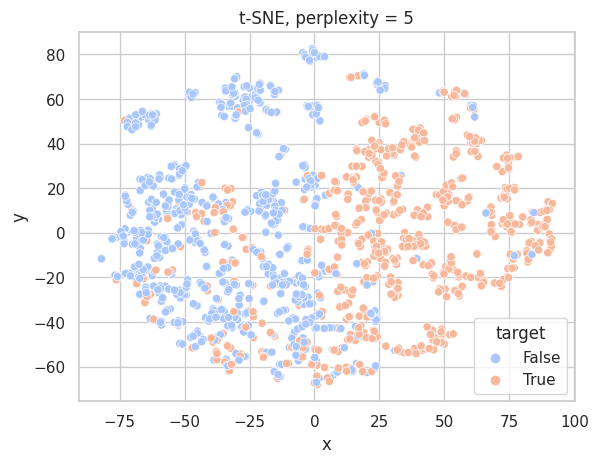

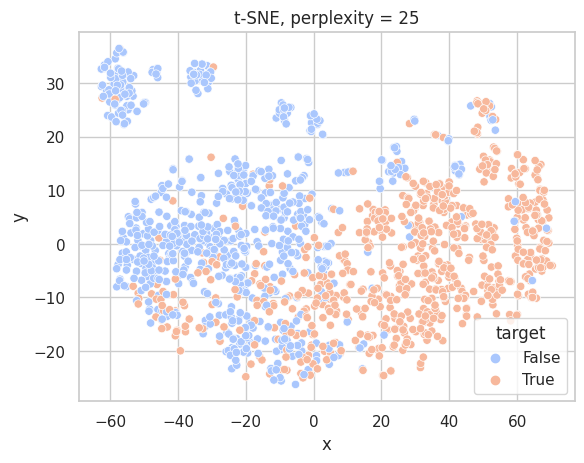

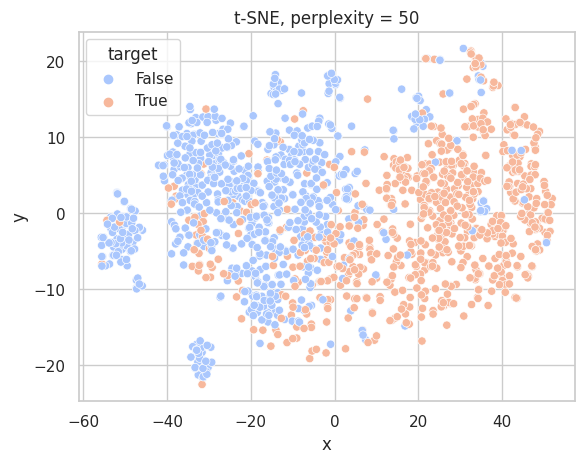

In [ ]:
for item in perplexities:
  tsne = TSNE(perplexity = item)
  tsne_X = tsne.fit_transform(X)

  plot_df = pd.DataFrame.from_records(data=tsne_X,columns=["x","y"])
  y = ["SalePriceBinary"]
  plot_df["target"] = data[y]

  sns.scatterplot(x="x", y="y", hue="target", palette="coolwarm", data=plot_df)
  plt.title(f"t-SNE, perplexity = {item}")
  plt.show()

Authors of t-SNE algorithm suggest to combine PCA and t-SNE if number of features is big. At first reduce the dimension to 30 features with PCA and then apply t-SNE.

[How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/)

Let's try.





In [ ]:
pca = PCA(n_components=30)
X_pca30 = pca.fit_transform(X)

In [ ]:
pca.explained_variance_ratio_.sum()

0.7735615422557148

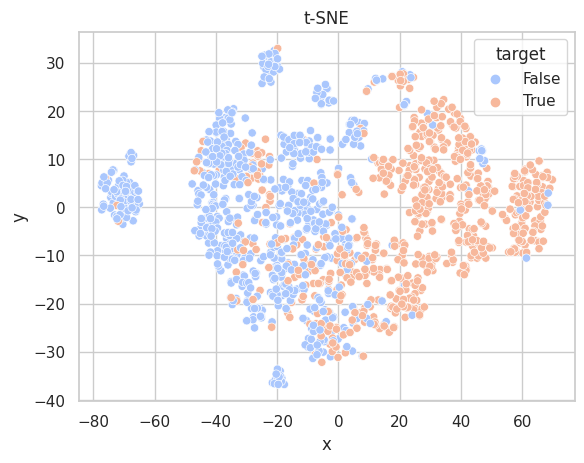

In [ ]:
tsne = TSNE()
tsne_X = tsne.fit_transform(X_pca30)

plot_df = pd.DataFrame.from_records(data=tsne_X,columns=["x","y"])
y = ["SalePriceBinary"]
plot_df["target"] = data[y]

sns.scatterplot(x="x", y="y", hue="target", palette="coolwarm", data=plot_df)
plt.title("t-SNE")
plt.show()

In [ ]:
tsne = TSNE(n_components=3)
tsne_X = tsne.fit_transform(X_pca30)

plot_df = pd.DataFrame(tsne_X, columns=["x", "y", "z"])
plot_df["target"] = data[y]

fig = px.scatter_3d(plot_df, x="x", y="y", z="z", color="target", title="t-SNE visualization 3D")
fig.show()

# Appendix

## Travel through the Universe

Let's explore an excellent example of dimensionality reduction using artificial data in a 3D space.

The dataset represents (schematically) 4 nearest galaxies (clusters), which are situated in the way excluding the mapping of these clusters onto 2D-plane without overlapping.

In [ ]:
RANDOM_STATE = 42
FONT_SIZE = 18

In [ ]:
def galaxy_gen(center=(0, 0, 0), nucl_size=(0.1, 0.1, 0.05), n_nucl=500,
               radius=1, arms=5, n_arms=500, size_arm=(0.03, 0.03, 0.01),
               random_state=None):
    np.random.seed(seed=random_state)

    x = nucl_size[0]*np.random.randn(n_nucl) + center[0]
    y = nucl_size[1]*np.random.randn(n_nucl) + center[1]
    z = nucl_size[2]*np.random.randn(n_nucl) + center[2]

    for k in range(arms):
        phi = 2*np.pi*np.linspace(0, 1, num=n_arms)
        x_arm = radius*(phi/(2*np.pi))**0.5*np.cos(phi+2*np.pi*k/arms) + size_arm[0]*np.random.randn(n_arms) + center[0]
        y_arm = radius*(phi/(2*np.pi))**0.5*np.sin(phi+2*np.pi*k/arms) + size_arm[1]*np.random.randn(n_arms) + center[1]
        z_arm = size_arm[2]*np.random.randn(n_arms) + center[2]
        x = np.append(x, x_arm)
        y = np.append(y, y_arm)
        z = np.append(z, z_arm)


    stars=np.array([x, y, z])

    return stars

In [ ]:
milky_way = galaxy_gen(center=(2, 2, 0), nucl_size=(0.1, 0.1, 0.05), n_nucl=500,
                       radius=1, arms=5, n_arms=500, size_arm=(0.03, 0.03, 0.01),
                       random_state=RANDOM_STATE)

large_magellanic_cloud = galaxy_gen(center=(1.7, 2.3, 0.3), nucl_size=(0.03, 0.03, 0.03), n_nucl=300,
                                    arms=0, random_state=RANDOM_STATE)

rot_matr_y = np.array([[0, 0, 1],
                       [0, 1, 0],
                       [-1, 0, 0]])

andromeda_galaxy = galaxy_gen(center=(0, 2, 0), nucl_size=(0.2, 0.2, 0.1), n_nucl=700,
                              radius=1.3, arms=4, n_arms=700, size_arm=(0.05, 0.05, 0.02),
                              random_state=RANDOM_STATE+1)
andromeda_galaxy = rot_matr_y @ andromeda_galaxy


rot_matr_x = np.array([[1, 0, 0],
                       [0, 0.5**0.5, -0.5**0.5],
                       [0, 0.5**0.5, 0.5**0.5]])

triangulum_galaxy = galaxy_gen(center=(1, 0, 0), nucl_size=(0.07, 0.07, 0.04), n_nucl=400,
                               radius=0.8, arms=3, n_arms=400, size_arm=(0.05, 0.05, 0.02),
                               random_state=RANDOM_STATE+2)
triangulum_galaxy = rot_matr_x @ triangulum_galaxy

In [ ]:
milky_way_df = pd.DataFrame(milky_way.T, columns=["x", "y", "z"])
large_magellanic_cloud_df = pd.DataFrame(large_magellanic_cloud.T, columns=["x", "y", "z"])
andromeda_galaxy_df = pd.DataFrame(andromeda_galaxy.T, columns=["x", "y", "z"])
triangulum_galaxy_df = pd.DataFrame(triangulum_galaxy.T, columns=["x", "y", "z"])


galaxy_name = ["Milky way", "Large Magellanic Cloud",
               "Andromeda Galaxy", "Triangulum Galaxy"]

for k, df in enumerate([milky_way_df, large_magellanic_cloud_df, andromeda_galaxy_df, triangulum_galaxy_df]):
    df["galaxy"] = np.full(len(df), galaxy_name[k])

galaxies_df = milky_way_df
for df in [large_magellanic_cloud_df, andromeda_galaxy_df, triangulum_galaxy_df]:
    galaxies_df = galaxies_df.append(df)

galaxies_df.head()

<ipython-input-144-68646d938c4b>:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-144-68646d938c4b>:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



x         y         z     galaxy
0  2.049671  2.092618  0.069968  Milky way
1  1.986174  2.190942  0.046232  Milky way
2  2.064769  1.860143  0.002982  Milky way
3  2.152303  2.056297 -0.032347  Milky way
4  1.976585  1.934936  0.034911  Milky way

In [ ]:
galaxies_df.shape

(8400, 4)

In [ ]:
grass_green = np.array([86, 125, 70])/255
golden = np.array([212, 175, 55])/255
grey = np.array([128, 128, 128])/255
navy = np.array([60, 59, 110])/255
bronze = np.array([205, 127, 50])/255
copper = np.array([184, 115, 51])/255
burgundy = np.array([128, 0, 32])/255

color_list = [grass_green, burgundy, grey, navy]

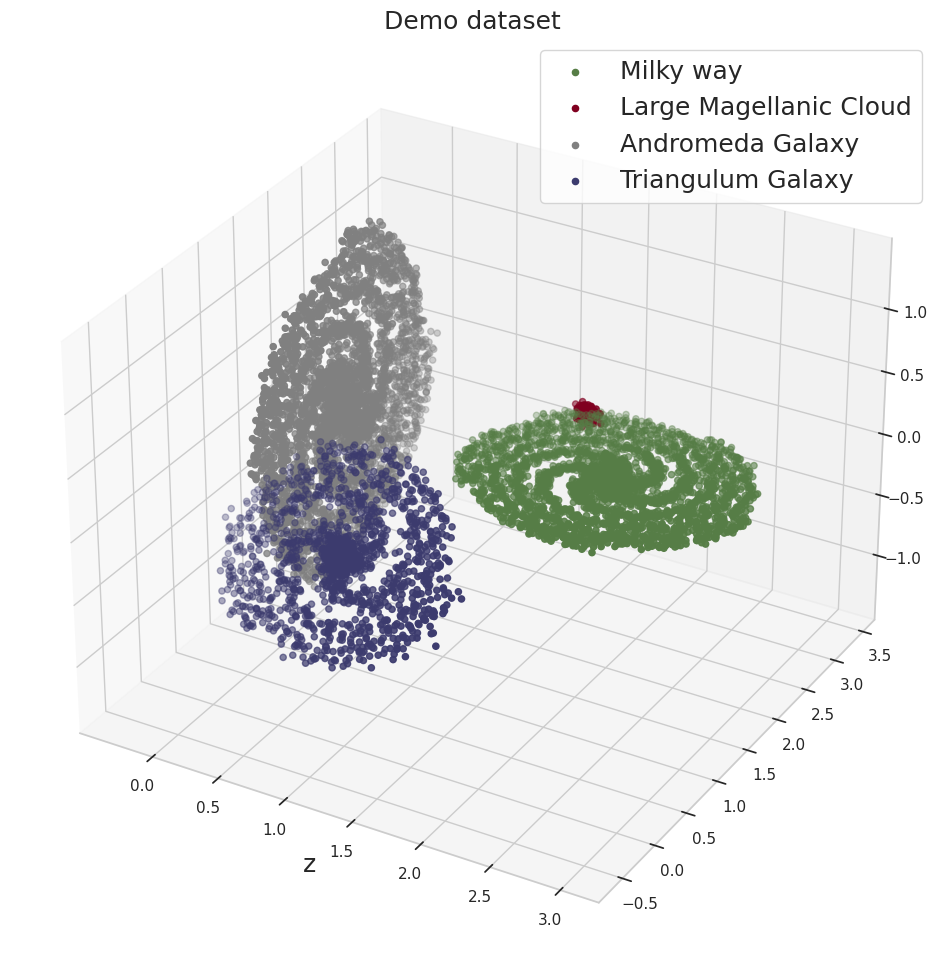

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection="3d")

ax.scatter(milky_way[0], milky_way[1], milky_way[2], "o", color=color_list[0], label=galaxy_name[0])
ax.scatter(large_magellanic_cloud[0], large_magellanic_cloud[1], large_magellanic_cloud[2],
           "o", color=color_list[1], label=galaxy_name[1])
ax.scatter(andromeda_galaxy[0], andromeda_galaxy[1], andromeda_galaxy[2],
           "o", color=color_list[2], label=galaxy_name[2])
ax.scatter(triangulum_galaxy[0], triangulum_galaxy[1], triangulum_galaxy[2],
           "o", color=color_list[3], label=galaxy_name[3])

plt.legend(fontsize=FONT_SIZE)
plt.title("Demo dataset", fontsize=FONT_SIZE)
plt.xlabel("x", fontsize=FONT_SIZE)
plt.xlabel("y", fontsize=FONT_SIZE)
plt.xlabel("z", fontsize=FONT_SIZE)
plt.show()

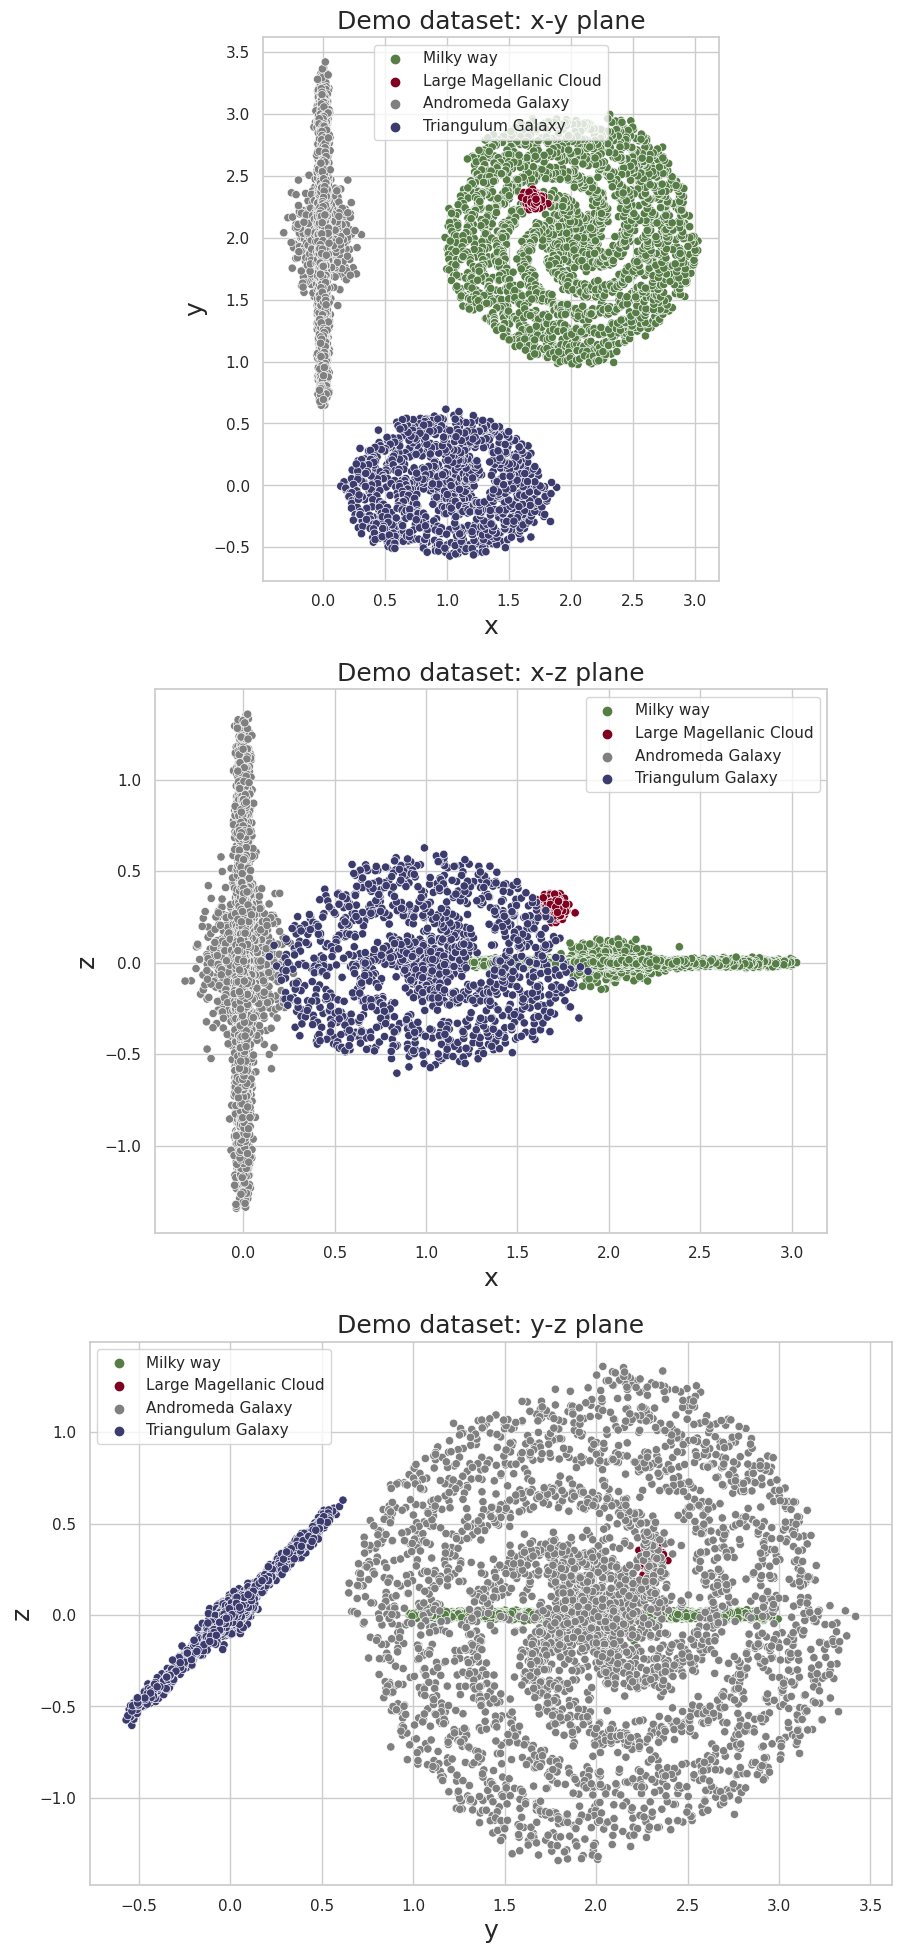

In [ ]:
plt.subplots(3, 1, figsize=(12, 24))

ax = plt.subplot(3, 1, 1)
ax.set_aspect("equal")
sns.scatterplot(x="x", y="y", hue=galaxies_df["galaxy"].tolist(),
                data=galaxies_df, palette=color_list)
plt.title("Demo dataset: x-y plane", fontsize=FONT_SIZE)
plt.xlabel("x", fontsize=FONT_SIZE)
plt.ylabel("y", fontsize=FONT_SIZE)



ax = plt.subplot(3, 1, 2)
ax.set_aspect("equal")
sns.scatterplot(x="x", y="z", hue=galaxies_df["galaxy"].tolist(),
                data=galaxies_df, palette=color_list)
plt.title("Demo dataset: x-z plane", fontsize=FONT_SIZE)
plt.xlabel("x", fontsize=FONT_SIZE)
plt.ylabel("z", fontsize=FONT_SIZE)



ax = plt.subplot(3, 1, 3)
ax.set_aspect("equal")
sns.scatterplot(x="y", y="z", hue=galaxies_df["galaxy"].tolist(),
                data=galaxies_df, palette=color_list)
plt.title("Demo dataset: y-z plane", fontsize=FONT_SIZE)
plt.xlabel("y", fontsize=FONT_SIZE)
plt.ylabel("z", fontsize=FONT_SIZE)


plt.show()

We should scale our dataset, e.g., with StandardScaler.

In [ ]:
scaler = StandardScaler()
rescaled = scaler.fit_transform(galaxies_df.drop(["galaxy"], axis=1))

### PCA 2D

The technique of PCA is based on the diagonalization of correlation matrix, i.e., within our geometrical demo-problem - on the rotation of  2𝐷  mapping plane.

In [ ]:
pca = PCA(n_components=2)
pca.fit(rescaled)
reduced = pca.transform(rescaled)

We can obtain 2 orthogonal unit vectors of the resulting mapping plane:

In [ ]:
pca.components_

array([[ 0.20079095,  0.66363831,  0.72060196],
       [ 0.91861767, -0.38309598,  0.0968455 ]])

In [ ]:
print("The euclidean norm of vectors are: {:.6f} and {:.6f}, while"
      .format( pca.components_[0] @ pca.components_[0], pca.components_[1] @ pca.components_[1] ))
print("their scalar product is {:.6f}".format(pca.components_[0] @ pca.components_[1]))

The euclidean norm of vectors are: 1.000000 and 1.000000, while
their scalar product is 0.000000


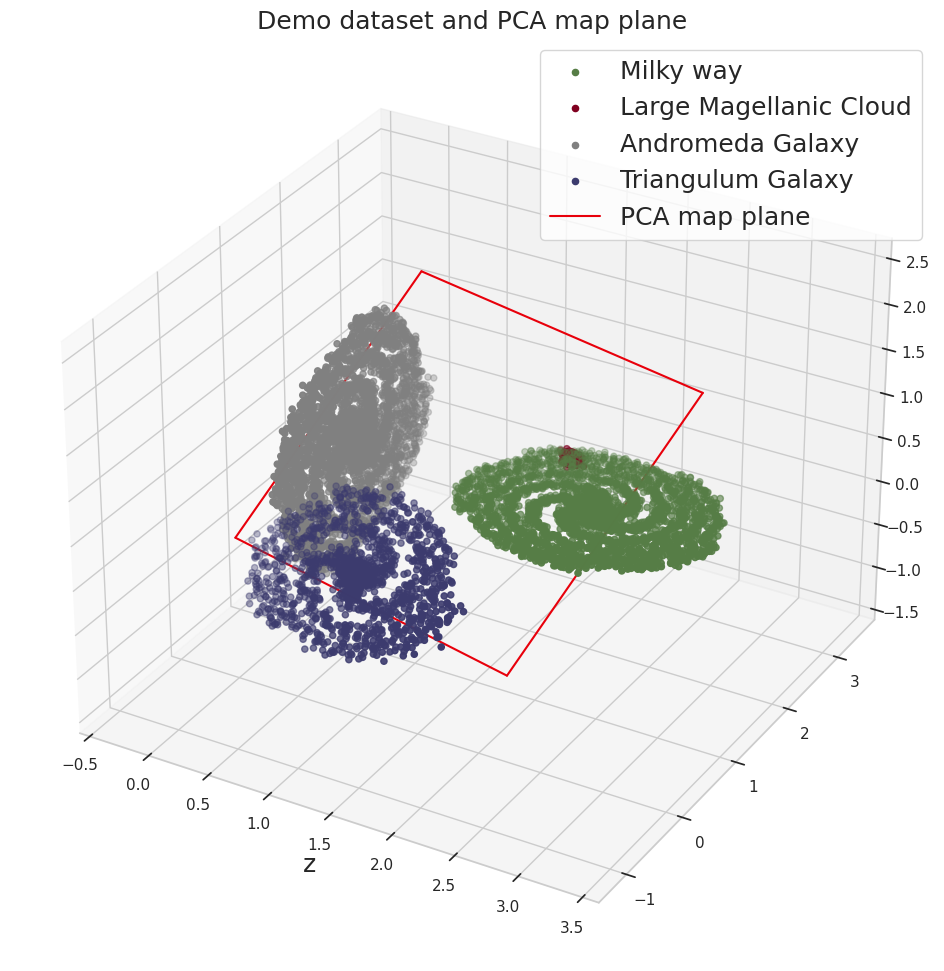

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection="3d")

ax.scatter(milky_way[0], milky_way[1], milky_way[2], "o", color=color_list[0], label=galaxy_name[0])
ax.scatter(large_magellanic_cloud[0], large_magellanic_cloud[1], large_magellanic_cloud[2],
           "o", color=color_list[1], label=galaxy_name[1])
ax.scatter(andromeda_galaxy[0], andromeda_galaxy[1], andromeda_galaxy[2],
           "o", color=color_list[2], label=galaxy_name[2])
ax.scatter(triangulum_galaxy[0], triangulum_galaxy[1], triangulum_galaxy[2],
           "o", color=color_list[3], label=galaxy_name[3])

### map plane
plt.plot((0, 3*pca.components_[0, 0]), (0, 3*pca.components_[0, 1]), (0, 3*pca.components_[0, 2]),
         "-r", label="PCA map plane")
plt.plot((0, 3*pca.components_[1, 0]), (0, 3*pca.components_[1, 1]), (0, 3*pca.components_[1, 2]), "-r")
plt.plot((3*pca.components_[0, 0], 3*pca.components_[0, 0]+3*pca.components_[1, 0]),
         (3*pca.components_[0, 1], 3*pca.components_[0, 1]+3*pca.components_[1, 1]),
         (3*pca.components_[0, 2], 3*pca.components_[0, 2]+3*pca.components_[1, 2]), "-r")
plt.plot((3*pca.components_[1, 0], 3*pca.components_[0, 0]+3*pca.components_[1, 0]),
         (3*pca.components_[1, 1], 3*pca.components_[0, 1]+3*pca.components_[1, 1]),
         (3*pca.components_[1, 2], 3*pca.components_[0, 2]+3*pca.components_[1, 2]), "-r")

plt.legend(fontsize=FONT_SIZE)
plt.title("Demo dataset and PCA map plane", fontsize=FONT_SIZE)
plt.xlabel("x", fontsize=FONT_SIZE)
plt.xlabel("y", fontsize=FONT_SIZE)
plt.xlabel("z", fontsize=FONT_SIZE)
plt.show()

In [ ]:
print("The resultiing 2 principal components keep {:.1%} of total variance."
      .format( pca.explained_variance_ratio_.sum() ))

The resultiing 2 principal components keep 68.7% of total variance.


In [ ]:
galaxies_reduced = pd.DataFrame(reduced, columns=["x_map", "y_map"])
galaxies_reduced["galaxy"] = galaxies_df["galaxy"].values
galaxies_reduced.head(10)

x_map     y_map     galaxy
0  0.668353  0.879270  Milky way
1  0.682281  0.771126  Milky way
2  0.384588  0.973631  Milky way
3  0.479657  0.969379  Milky way
4  0.476871  0.864653  Milky way
5  0.461068  0.854215  Milky way
6  0.537395  1.041206  Milky way
7  0.477254  0.970215  Milky way
8  0.553517  0.817157  Milky way
9  0.369254  0.932767  Milky way

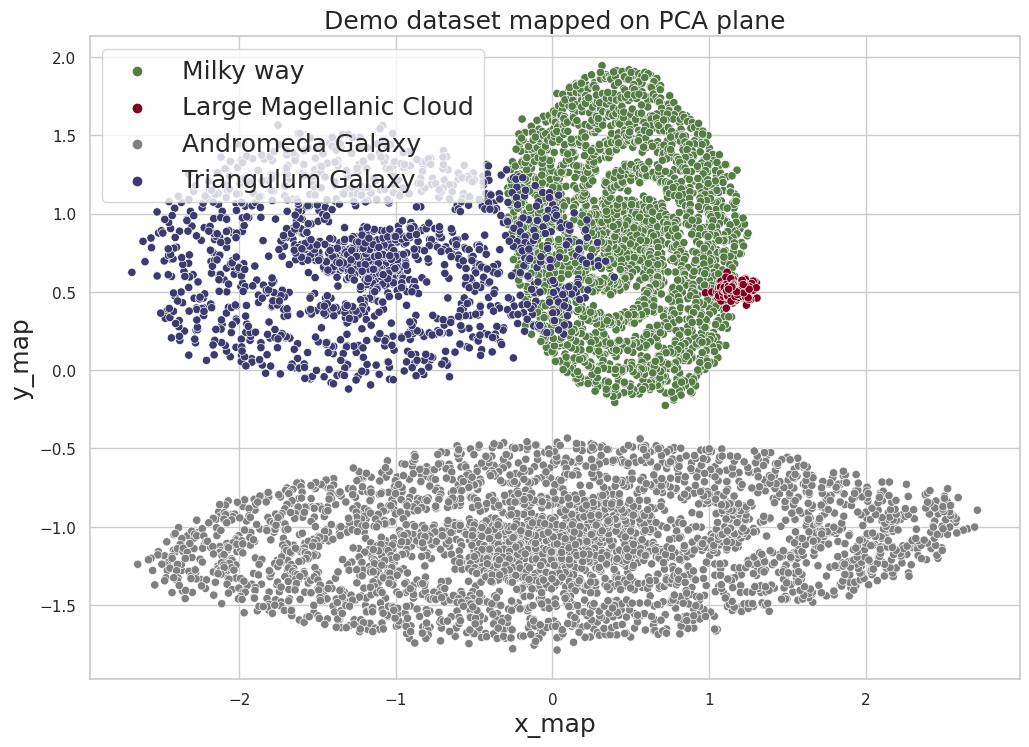

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.set_aspect("equal")

sns.scatterplot(x="x_map", y="y_map", hue=galaxies_reduced["galaxy"].tolist(),
                data=galaxies_reduced, palette=color_list)
plt.title("Demo dataset mapped on PCA plane", fontsize=FONT_SIZE)
plt.xlabel("x_map", fontsize=FONT_SIZE)
plt.ylabel("y_map", fontsize=FONT_SIZE)
plt.legend(fontsize=FONT_SIZE)

plt.show()

The mapping of PCA looks a bit better than simplest mapping on basic  𝑥−𝑦 ,  𝑥−𝑧  or  𝑦−𝑧  planes. But nevertheless, due to its nature it can not avoid overlapping of clusters.

### t-SNE

In [ ]:
perplexity = 30

reduced = TSNE(n_components=2, perplexity=perplexity,
                 random_state=RANDOM_STATE).fit_transform(rescaled)

In [ ]:
galaxies_reduced = pd.DataFrame(reduced, columns=["x_map", "y_map"])
galaxies_reduced["galaxy"] = galaxies_df["galaxy"].values
galaxies_reduced.head()

x_map      y_map     galaxy
0   8.053175  49.564953  Milky way
1   6.823595  47.783318  Milky way
2  20.615086  51.318516  Milky way
3  26.509834  38.611565  Milky way
4  13.607266  50.359657  Milky way

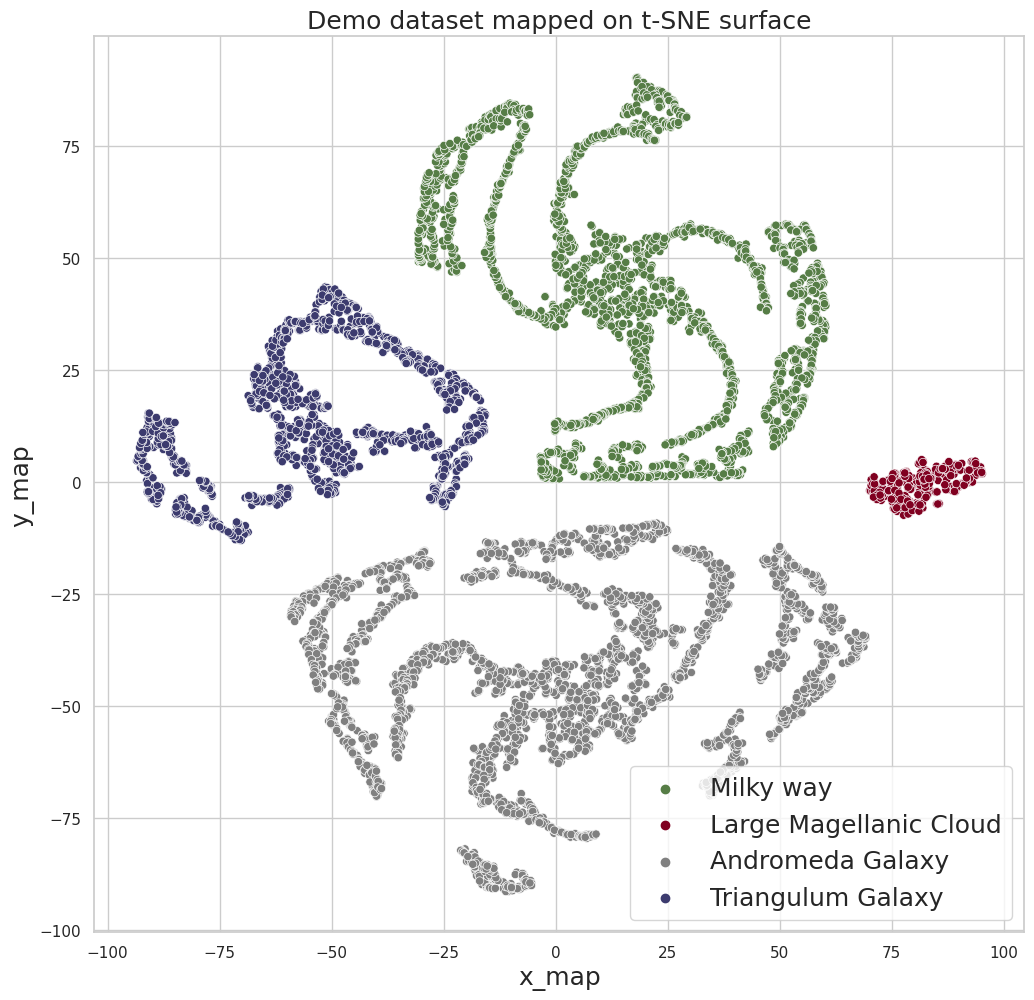

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.set_aspect("equal")

sns.scatterplot(x="x_map", y="y_map", hue=galaxies_reduced["galaxy"].tolist(),
                data=galaxies_reduced, palette=color_list)
plt.title("Demo dataset mapped on t-SNE surface", fontsize=FONT_SIZE)
plt.xlabel("x_map", fontsize=FONT_SIZE)
plt.ylabel("y_map", fontsize=FONT_SIZE)
plt.legend(fontsize=FONT_SIZE)

plt.show()

One can recognize the local topology of Milky way center with 5 arms, of Andromeda galaxy with 4 arms and, of course, of simple Magellanic cloud. But not a global but even a "middle-scale" toplogy has been disturbed. Simply connected Andromeda and Triangulum galaxies now are teared apart.

# ydata-profiling

ydata-profiling python library with primary goal is to provide a one-line Exploratory Data Analysis (EDA) experience in a consistent and fast solution.

[pypi](https://pypi.org/project/ydata-profiling/)

Colab [example](https://colab.research.google.com/github/Data-Centric-AI-Community/awesome-data-centric-ai/blob/master/medium/data-profiling-tools/notebooks/ydata_profiling_demo.ipynb#scrollTo=3ejdeKW-VJEq)



---



---


Thank you for your attention!

Good luck!

---



---

